In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model
import keras
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import os
import random
import pickle
import seaborn as sns
import timeit
from sklearn.metrics import confusion_matrix
import itertools 


In [11]:
def plot_func(md_name, name,mixup=False):
    baseline=pd.read_csv(md_name)
    epochs=baseline.shape[0]

    
    if name=='Gender':
        
        baseline['loss'][0]=1
        plt.ylim([0,1])
        plt.plot(np.arange(0,100,5), baseline['val_accuracy'].iloc[range(0,100,5)],color= 'forestgreen', label = 'val_accuracy')
        plt.plot(np.arange(0,100,5), baseline['accuracy'].iloc[range(0,100,5)], color= 'darkorange', label = 'accuracy')
        plt.plot(np.arange(0,100,5), baseline['loss'].iloc[range(0,100,5)], color= 'goldenrod', label = 'loss')
        plt.plot(np.arange(0,100,5), baseline['val_loss'].iloc[range(0,100,5)],color= 'firebrick', label = 'val_loss')
        
    else:
     
        plt.ylim([3,5])
        

        plt.plot(np.arange(epochs), baseline['loss'].values, color= 'goldenrod', label = 'loss')
        plt.plot(np.arange(epochs), baseline['val_loss'].values,color= 'firebrick', label = 'val_loss')
 
        

    if mixup==True:
        n=' with Mixup Generator'
        k='_aug_'

    else:
        n=''
        k=''


    plt.xlabel('Epochs', fontsize =15)
    plt.title('VGG-Face '+name+' Plot'+n, fontsize =15)
    plt.xlim([0,epochs])
    
    plt.legend(fontsize=12, loc='best')
    plt.savefig('./outputs/Vgg_Results/vgg_'+name+k+'_plot.jpg')
    

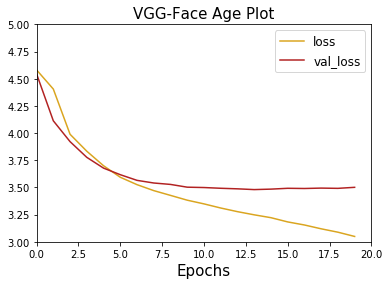

In [3]:

plot_func('./outputs/baseline_age.csv', 'Age')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


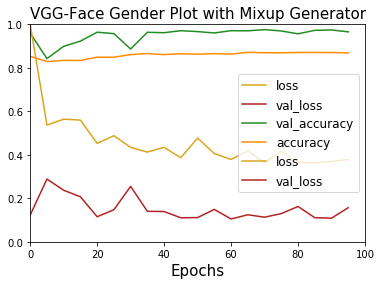

In [5]:

plot_func('./outputs/baseline_age_aug.csv', 'Age', mixup=True)
plot_func('./outputs/baseline_gender_aug.csv', 'Gender', mixup=True)



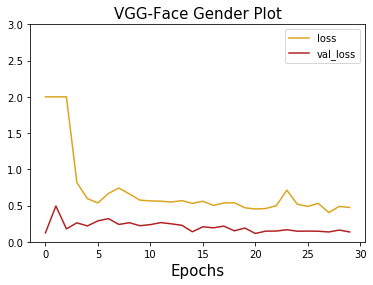

In [19]:
baseline=pd.read_csv('./outputs/baseline_gender_aug.csv')
baseline['loss'].iloc[[0,1,2]]=2
plt.plot(np.arange(0,30), baseline['loss'].iloc[range(0,30)], color= 'goldenrod', label = 'loss')
plt.plot(np.arange(0,30), baseline['val_loss'].iloc[range(0,30)],color= 'firebrick', label = 'val_loss')
plt.title('VGG-Face Gender Plot', fontsize=15)
plt.legend()
plt.xlabel('Epochs', fontsize =15)
plt.ylim([0,3])
plt.savefig('./outputs/Vgg_Results/vgg_Gender_aug__plot.jpg')



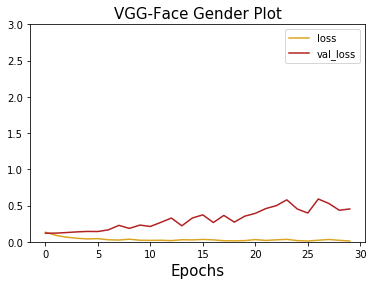

In [15]:
baseline=pd.read_csv('./outputs/baseline_gender__ .csv')

plt.plot(np.arange(0,30), baseline['loss'], color= 'goldenrod', label = 'loss')
plt.plot(np.arange(0,30), baseline['val_loss'],color= 'firebrick', label = 'val_loss')
plt.title('VGG-Face Gender Plot', fontsize=15)
plt.legend()
plt.ylim([0,3])
plt.xlabel('Epochs', fontsize =15)
plt.savefig('./outputs/Vgg_Results/vgg_Gender_plot.jpg')


In [20]:
#Make Line Plot for validation Accuracy
def wideresnet_plot_func(filename, name, mixup=False):
    baseline=pd.read_csv(filename)
    epochs=baseline.shape[0]

    if name=='gender':
        baseline['gender_loss'][0]=0.9
        plt.ylim([0,1])
    else:
        plt.ylim([3,5])
        
        
    plt.plot(np.arange(epochs), baseline['val_'+name+'_loss'], marker= 'D',color= 'goldenrod', label = 'val_loss')
    plt.plot(np.arange(epochs), baseline[name+'_loss'], marker= '8',color= 'firebrick', label = 'loss')

    if mixup==True:
        n=' with Mixup Generator'
        k='_aug_'

    else:
        n=''
        k=''

    plt.xlabel('Epochs', fontsize =15)
    plt.title('Wide Resnet '+name+' Plot '+n, fontsize =15)

    plt.xlim([0,epochs])
    
    plt.legend(fontsize=12)
    plt.savefig('./outputs/Vgg_Results/wideresnet_'+name+k+'_plot.jpg')
    



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


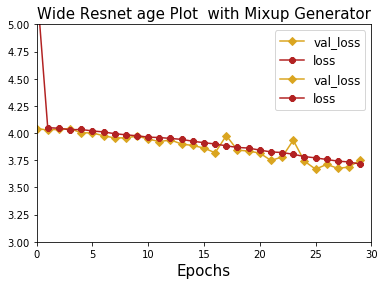

In [21]:
wideresnet_plot_func('./outputs/wideresnet_age_aug.csv', 'gender', mixup=True)
wideresnet_plot_func('./outputs/wideresnet_age_aug.csv', 'age', mixup=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


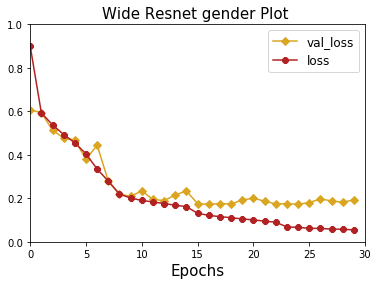

In [22]:
wideresnet_plot_func('./outputs/wideresnet_age__.csv', 'gender')


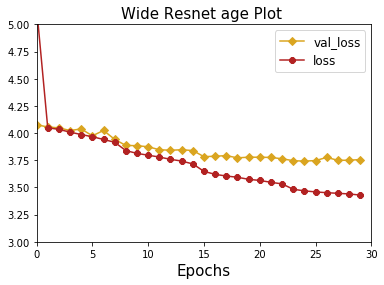

In [9]:
wideresnet_plot_func('./outputs/wideresnet_age__.csv', 'age')

In [ ]:
plt.figure(figsize=(20,10))


kwargs = {'alpha':0.8, 'linestyle':':', 'linewidth':3, 'edgecolor':'k'}

plt.bar(x= 1, height=5.33 , width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face on WIKI')
plt.bar(x= 2, height= 7.56, width = 0.9,color=['goldenrod'], **kwargs, label = 'Wide-Resnet on WIKI')
plt.bar(x=3, height=  16.78, width = 0.9, color=['forestgreen'], **kwargs, label = 'VGG-Face on UTKF')
plt.bar(x= 4, height=  19.39, width = 0.9, color=['goldenrod'], **kwargs, label ='Wide-Resnet on UTKF')

plt.bar(x=6, height=  14.253, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=7, height=  12.97, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.bar(x=8, height=  20.999, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=9, height=  21.83, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')

plt.bar(x=11, height=  15.359, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=12, height=  14.426, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.bar(x=13, height=  21.526, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=14, height=  22.104, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.xticks([2-0.5,3.5, 7-0.5, 8.5, 11.5,13.5], ['Wiki', 'UTKF', 'Wiki', 'UTKF', 'Wiki', 'UTKF'], fontsize = 20)

plt.ylim([80,100])
plt.ylabel('Accuracy', fontsize = 20, coldata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJUAAAJMCAYAAABD1ZcDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzde1xUdf4/8NcRYQDlooCGJmLihfVWSqVr4q0S/W4X+VpeoG92w767XaR2+/4S+27tSttuJW7b1wu5Wd7w0oJpKbaGCZqFgIIaFwEnLiK3keEyMMB4fn8gI6cZHVHhM3pez8fDRzLvM4fXjA/e5ns+53MkWZZBRERERERERETUGT1EByAiIiIiIiIiolsPh0pERERERERERNRpHCoREREREREREVGncahERERERERERESdxqESERERERERERF1GodKRERERERERETUaUKHSpIkDZIk6aAkSdmSJJ2WJOnVS4+/LUlSqSRJJy79miMyJxERERERERERKUmyLIv75pLkC8BXluUMSZLcAKQDeBzAkwDqZVn+QFg4IiIiIiIiIiK6op4iv7ksy2UAyi79vk6SpGwAA0VmIiIiIiIiIiIi2+xmTyVJkvwB3APgx0sPvSRJUpYkSZ9KktRHWDAiIiIiIiIiIrIg9PI3cwhJ6g3gEIBoWZbjJUnqD6AKgAzgz2i7RO5ZK8+LABABAL169ZowcuTIbkxNRERERERERHR7S09Pr5Jl2cdaTfhQSZIkRwBfAdgvy/JKK3V/AF/Jsjz6aucJCgqS09LSuiQjEREREREREZEaSZKULstykLWa6Lu/SQD+CSC740Dp0gbe7eYCONXd2YiIiIiIiIiI6MqEbtQNYDKApwCclCTpxKXHlgFYKEnS3Wi7/E0LYImYeEREREREREREZI3ou78dBiBZKe3t7ixERERERERERHTt7Obub0REREREREREdOvgUImIiIiIiIiIiDqNQyUiIiIiIiIiIuo0DpWIiIiIiIiIiKjTOFQiIiIiIiIiIqJOE3r3N1GMRiN0Oh3q6upgMplExyESwsHBAW5ubujbty80Go3oOERERERERHSLUd1QyWg0oqioCH369IG/vz8cHR0hSZLoWETdSpZltLS0oLa2FkVFRfDz8+NgiYiIiIiIiDpFdZe/6XQ69OnTB97e3nBycuJAiVRJkiQ4OTnB29sbffr0gU6nEx2JiIiIiIiIbjGqGyrV1dXB3d1ddAwiu+Hu7o66ujrRMYiIiIiIiOgWo7qhkslkgqOjo+gYRHbD0dGRe4sRERERERFRp6luqASAl7wRdcCfByIiIiIiIroeqhwqERERERERERHRjeFQiYiIiIiIiIiIOq2n6AD2Ljg4GAaDAQCQnJwMV1dXRT0oKMj8+7S0NEXNYDAgODgYAODq6ork5GRFvbKyErNnzwYAeHt7IzExUVEvKipCaGgoAMDPzw/x8fE34RUREREREREREd04DpV+4eT5kzhVfsr8dWVDJYxNRgDAjqwd0LhoFMfrGi/fij0uM05RMzYazfUGucGiXqurNddb6los6lVlVeZ6D30PxGXGYXT/0Rhzx5jrfn2LFi1CXFwcVq9ejf/+7/++6rEPPfQQDhw4gISEBDz++OMAAFmW8eWXXyIuLg6pqamoqKiAyWSCt7c3xo4di5CQEISFhcHLy8vqOUtLS7F27VocOHAAZ86cgV6vh6urK+666y5MmjQJTz75JKZNm3bNr0er1WLIkCFXPebgwYOdOicRERERERER2cahUgeVlZX4Pvt7JPyUAI172/CooqECJmPbnbF2ntqJnhrlW6YzXB4qbcvapqi1GlvNdQeTg0XdWGs01+sd6i3qhiqDud6ob8S2rG1YMHbBDQ2VIiIiEBcXh08++eSqQyWtVotvv/0Wvr6++M1vfgMAOHfuHObPn4/Dhw/D1dUV06dPx9y5c+Hs7Izz58/j+++/x6uvvoqoqCjk5+ejf//+inPGxsbi1VdfRVNTE0aOHIm5c+eiX79+aGhoQG5uLjZu3Ig1a9bg97//Pd5///1OvS4PDw8sXbrUas3f379T5yIiIiIiIiIi2zhU6mD27NnQNeqgM+gw9U9TAQAPRD1w1ee0H2dNT03Pq9Y17pqr1l29Xa9avx7Tpk3D8OHDcfz4cWRkZGD8+PFWj/vnP/8JWZbxzDPPoGfPnmhoaEBISAhOnjyJJ554AmvWrLG6GumHH37Am2++icbGRsXjn3/+OZYsWYI+ffpg27ZteOyxxyyeW1tbi3Xr1qGoqKjTr8vT0xNvv/12p59HRERERERERNeHG3XfQupK61BaWIrs7OwbOs8LL7wAAPjkk0+s1k0mEzZs2ABJkvD8888DAD744AOcPHkSU6ZMQVxc3BUvb5s4cSKSkpIwaNAg82N6vd68imj79u1WB0oA4O7ujj/84Q+IiYm57tdmS1paGl555RWMHTsWffr0gbOzM4YPH44//OEPqKmpueLz4uLiMGPGDPTt2xfOzs7w9/fHokWLkJGRYXHsli1bMG3aNHh6esLZ2Rm/+tWv8O6776K5ubnLXhcRERERERFRd+NQqQNvb2+4ebrByc1JdBSrMtZlYPXy1Xjqqadu6DxPP/00nJycsHXrVvMm5B3t27cPpaWlePDBB837Ff3zn/8EALz11ltwcHC46vklSVIc88UXX6Cmpga//vWv8dBDD9nM17Nn1y2gW7t2LXbu3InAwEA8++yzePHFF9G/f3988MEHmDJlChoaGhTHy7KM8PBwLFq0CKdOnUJoaCgiIyPxwAMP4NChQ9i7d6/i+Keffhrh4eE4e/Ys5s2bh9/97nfw8PBAVFQU5syZA5PJ1GWvjYiIiIiIiKg78fK3DhITExGXGWext9HtxsfHB48//jh27NiBHTt2YPHixYp6+wqmiIgIAG13oSsuLkbPnj3Nd7PrjCNHjgAAZsyYcWPBr6Kmpsbq5W933323eZNxoG0otm7dOovB2Lp16/Diiy9i7dq1eP31182Pr1mzBlu2bMHEiROxf/9+uLu7m2smkwkVFRXmr9evX4+NGzfiiSeewMaNG+Hs7Kz4vitWrMDatWvxu9/97ma8ZCIiIiIiIiKhJFmWRWe4KYKCguS0tDSbx2VnZyMwMPCKdXseKqWvTYe/pz/8+/hj8+bNN3Sub7/9Fg8++CAmT56Mw4cPmx8vKyuDn58fvLy8UFxcDEdHR6SmpuL+++9H//79cf78eYtz7dq1CydOnFA8Nm3aNPMd1+bMmYN9+/ZhzZo1ePHFFxXH1dTUYNWqVRbnvNb9kWzd/e3pp5/GZ599ZvM8Fy9ehLu7O37961/jm2++MT8eGBiI3NxcnDhxAmPHjr3qOcaMGYO8vDxUVlYqhk8A0NraCh8fHwQGBuL777+3mae72fq5ICIiIiIiInWSJCldluUgazWuVLqFTHhxAhaMXYCF4xbe8LlmzJiBoUOH4siRI4qBwoYNG9Da2orFixfD0dERQNslYEDbZW3W7Nq1C59//rnF4+1Dpas9v6amBu+8847F4+1DpRMnTmDXrl2Kmqenp8Wd3gYPHgytVnuFV3tZS0sL1qxZg+3bt+Onn35CbW0tLl68aK6Xlpaaf6/X65GTk4OBAwfaHCjV1dXh1KlT6N+/P1auXGn1GGdn5xveD4uIiIiIiIjIXnCopFLtm3C/+eabWL9+PT788EPIsoxPP/1UsUE3APj6+gIAqqqqYDQaodFoFOf67LPPzKuB1q9fb94I/JfP7ziwaefv74+Oq+XuvPNOxXEnTpywGDoNHjzYYqh0rf7zP/8Te/bswdChQzF37lz079/f/HpWrlwJo9FoPrZ94+6BAwfaPK9OpwMAlJeXWx2StevK/aKIiIiIiIiIuhM36u6gqKgIVWVVMFRZbl59O3rmmWfg6OiIjRs3orm5GUlJSSgoKMD06dMREBBgPs7Pzw+DBg1Ca2srkpOTO/19Jk+eDKDtkrvOWrx4MWRZVvy6lhVJ1vzwww/Ys2cPZs2ahZycHHz66af4y1/+grfffhtvvfWWYqAEtK2IAqwPw37Jw8MDAHDvvfda5O34q6Wl5bqyExEREREREdkbDpU6CA0NRczrMTj20THRUbpF//798eijj6Kqqgq7du3C+vXrAVzeoLuj5557DgAQHR2tuFzsWsybNw+enp74/vvvr2uwdLPk5+cDAB577DGLFUNHjx5Fc3Oz4jEPDw+MHDkS586dQ1ZW1lXP7enpiREjRuDkyZPmFU5EREREREREtzMOlW4hNWdrUPhTIdLT02/aOdsvVfvwww+RkJAAb29vzJ071+K4119/HaNHj8ahQ4cQFhZmvtzLIqOVgYqHh4d5M+4nn3wSe/bssfpcg8HQpSt5/P39AQDfffed4vHy8nK8/PLLVp/zyiuvQJZlLFmyBLW1tYqayWRSbFz+2muvoampCc899xz0er3FuXQ6HY4fP35jL4KIiIiIiIjITnCDlw78/PzQQ98DjfpG0VGsytyQiWLXYiS4JOBa7nR3LR5++GEMGTIEqampAICXXnoJTk5OFsf17t0b+/fvxxNPPIFt27Zh9+7dmDFjBkaMGAEnJyeUl5cjIyMDJ06cgJubG+655x7F859++mkYjUa88sorePTRRxEYGIjJkyejX79+qK+vR0lJCb755hvU19djypQpN+W1/dKkSZMwceJE7NixAyUlJZg8eTLOnz+PvXv3YvTo0ejfv7/Fc1588UUcPnwYW7duxbBhw/Doo4/Cx8cHpaWlSEpKwpIlS7B8+XIAbSu80tPTERsbi0OHDuHhhx+Gn58fdDodCgsLkZKSghdeeAEff/xxl7w+IiIiIiIiou4kddwk+VYWFBQkX8ugxdat059/63l8sfkLAMDg6YPhP91fUS9ILEDJ9yUAgLtm3YVBkwcp6nm781CWVgYAGPbIMAy4d4Dy++/MRsXJCgBA4LxA9BvbT1E/teUUqnOrAQCjF42G10gvc+3HlT9igPsA9GjocdOGSkDbJW3tg5GcnByMGDHiisdevHgRX375JbZu3YrU1FRUVFRAlmV4eXlhzJgxmD17NsLDw+Hl5WX1+SUlJVizZg0OHDiAM2fOoK6uDq6urvD398ekSZOwcOFCTJ069Zqza7VaDBky5Jrv/lZVVYXly5dj3759KC8vx5133on58+dj+fLlGDZsGJydnc2XybWTZRmbNm3C+vXrkZmZiebmZvj6+mLy5Ml4/fXXcffddyuO3717N9atW4fU1FTU1NTAy8sLgwcPxsMPP4zw8PCrvr+i2Pq5ICIiIiIiInWSJCldluUgqzUOlZT++P4fsemzTQCAGaEzMHPeTEV976a9OLLvCABgdthsPPAfDyjquz7ZhWMH2/Zkeuy5x3DfzPsU9e3/2I6so2378zz5uycxbvI4RX3T+5uQczwHABD+ejgCJ1zOeqHiApI+T4I2R3tTh0pEHCoRERERERGRNVcbKvHyt18Y6DEQfV36AgDuG3QfFo5bqKifTzqPbJdsAMAkv0kW9ULfQhS4FAAApvhPQei4UEX9VP9TKHFpW+k07a5pCBkXoqin+qSiwqVtJdODAQ8ieFywon5i5wloob3+F0hEREREREREdBNwpRIR8eeCiIiIiIiIrLraSiXe/Y2IiIiIiIiIiDqNQyUiIiIiIiIiIuo0DpWIiIiIiIiIiKjTOFQiIiIiIiIiIqJO41CJiIiIiIiIiIg6jUMlIiIiIiIiIiLqNA6ViIiIiIiIiIio0zhUIiIiIiIiIiKiTuNQiYiIiIiIiIiIOo1DJSIiIiIiIiIi6jQOlYiIiIiIiIiIqNM4VLIhODgYQUFBCAoKgsFgsKi314KCgixqBoPBXAsODraoV1ZWmushISEW9aKiInM9NDT05rygLvDZZ59BkiR89tln1/ycxYsXQ5IkaLXaLstFRERERERERF2np+gA9qZJdxJG3Unz162NFTAZmwEA+oLtaHHRKI43GXXm3+vztypqhkajud4q1VvUa6trL9cNLZb1c1Xmeku9BH3+Vmj6joFz3zHX/frS09MRFBSE+++/Hz/88INFfevWrQgLCwMAFBYWYsiQIYp6Y2Mj+vTpgx49euDChQvQaDQW57AH3333HaZPn654rGfPnvDx8cHEiROxdOlSq4O+W93ixYvx+eef4+zZs/D39xcdh4iIiIiIiG5jHCp1UFlZidrCI6g9mwAvz7ZhiampEiajCQBQW7ATLc7Kt0w5VNqmqDU2tZrrJjhY1GtrOgydDPUW9boKw+WhUkMj9Pnb4BGAGxoq3XPPPejTpw/S0tJQW1sLd3d3RT0pKQmSJEGWZSQlJeG5555T1I8cOQKj0YiHHnrIPFCaO3cuJk6cCF9f3+vO1VUGDx6MxYsXA2hbOZaeno6EhATs2rUL27dvxxNPPCE2IBEREREREdEtikOlDmbPng2TUQeTUYevPmpbxbLz/clXfU77cda4OPe8at3LU3PV+sB+rletX48ePXpg2rRpSEhIwKFDh/DII48o6klJSZg2bRqysrKsDpWSkpIAADNnzjQ/5uHhAQ8Pj5ua82bx9/fH22+/rXjsvffew5tvvok33niDQyUiIiIiIiKi68Q9lW4hZ4rqkJtfiuzs7Bs6T/tAqH1A1E6r1eLs2bOYOXMmpk6dioMHD1o819pQ6Wp7Kh04cABTpkxBr1690LdvXzz++OPIycm5ar4ff/wR8+bNwx133AEnJycMGjQIS5Yswblz5zr7Uq1qH5RptVpUVVVZ1FtbW7F69WpMnDgR7u7ucHV1xT333IOPP/4YFy9etDh+9+7dmDlzJnx9faHRaDBgwABMnToVq1evVhw3bdo0SJKE1tZWvPvuuxg2bBg0Gg0GDRqE//mf/0Fzc7PVvDk5OVi8eDEGDRoEjUaD/v37Y9GiRcjNzVUcJ0kSPv/8cwDAkCFDIEkSJEniZXBERERERETUJbhSqQNvb2+0GlrQaqgXHcWqyA+Ow0HzMxw025GWlnbd55kxYwYA4Ntvv1U83v71jBkz4OHhgfj4ePz000/41a9+BQCora1FWloaPD09MX78eJvf54svvsD8+fPh5OSE+fPnw9fXF4cPH8akSZMwduxYq8/ZsGEDXnjhBWg0Gjz66KMYNGgQzpw5g/Xr12PPnj344Ycf4Ofnd92v/Zd69lT+CLS0tOCRRx7B/v37MWLECCxatAjOzs44ePAgXn75Zfz444/YtGmT+fjY2FgsWbIEd9xxBx555BF4e3ujoqICWVlZ2LBhA377299afM9FixYhJSUFs2fPhru7O/bu3Yu//e1vqKiowIYNGxTHJiYmIjQ01JwrICAAJSUliI+Px9dff42DBw+a/yz++Mc/YteuXcjMzMSrr74KT09PADD/l4iIiIiIiOhm4lCpg8TEROjzt1rsbXS7CQwMxIABA3Dq1ClUVlbCx8cHQNsqpN69e+Pee+8177WUlJRkHiodOnQIJpMJ06dPR48eV1/kVl9fjyVLlqBHjx5ISUlR3B0vMjISq1atsnhOXl4elixZAn9/fxw6dAgDBw4015KSkvDQQw/h1VdfRUJCwg29/nXr1gEARo8ebTFwiY6Oxv79+/HSSy9h1apVcHBwAACYTCZERETg008/xbx58/DYY4+Zz+Xk5ITMzEz069dPcS5rq6AAoKCgAKdPn0bfvn3N33PcuHHYuHEj/vKXv+COO+4AAFy4cAELFy6Eq6srkpOTzX8OAHD69Gncf//9eP7555GRkQEAePvtt6HVapGZmYmlS5dyhRIRERERERF1KV7+dgsZemdvDL9rAEaOHHnD55o+fTpkWVZc4nbw4EFMmTIFPXv2xKhRo9CvXz/FJXLWLn27ki+//BI6nQ6LFi1SDJSAtuGHtT2Y1qxZg5aWFvz9739XDJSAttVTjz76KPbs2YO6urprfp1arRZvv/023n77bbzxxhuYMWMG3nrrLbi7u5uHS+0uXryIjz/+GHfccQdiYmLMAyUAcHBwwIcffghJkrBlyxbF83r27AlHR0eL7+3t7W0101//+lfzQAkAevXqhbCwMFy8eFGxAm3jxo2oqanBO++8oxgoAcCoUaPwwgsv4Pjx4/jpp5+u+f0gIiIiIiIiulm4UukW8vc3xsMjYAE8Ahbd8LlmzpyJLVu2ICkpCU8++SSys7NRVlaGyMhI8zHTpk3Dv//9b1y8eBE9evQwD5UefPBBm+dvXz0zdepUi5qHhwfuvvtuHDp0SPH40aNHAbStiDp27JjF8yoqKmAymZCXl4cJEyZc0+v8+eef8c477yge69OnD5KSknD33XcrHs/Ly0N1dTWGDRuGFStWWD2fi4uLYk+rsLAwvP766xg1ahTmz5+PqVOnYvLkyebVX9b8csgGAIMGDQLQtjqpXfv7kZmZabHZeHteAMjOzrYYOhERERERERF1NQ6VVKp9tVH7Pkod91NqN23aNOzYsQPHjx/H4MGDcfLkSQwcOBAjRoyweX69Xg8A6N+/v9V6+yVeHVVXVwMA3n///aueu77+2ve8mjp1Kr777jsAgE6nw7/+9S+89NJLeOSRR3Ds2DFFjvbvf+bMGYtB1JW+/2uvvQZvb2+sXr0aH330EVatWgVJkjB16lS8//77VgdI1vY4at/byWQyWeT55JNPrvoaO/N+EBEREREREd0svPytg6KiIhSfq0JphUF0lC7n5+eHoUOHIj8/H8XFxUhKSoKnpyfuuece8zHTp08H0HbZW1JSEmRZvqZL3wCYL28rLy+3Wj9//vwVn6PX6yHL8hV/WVv9dC369u2LF154AStXrkRJSYnFJtrt33/u3LlX/f5nz55VPO+//uu/8MMPP6C6uhpff/01nnvuOSQnJ2PWrFmoqKi4rqwd82RmZl41z9NPP33d34OIiIiIiIjoenGo1EFoaCie+t0qLFlx/XdWu5W0D4gOHDiAQ4cOYerUqYoNuEeOHAlfX1/zUKnjc2xpvyPZLy9xA9qGRidOnLB4fOLEiQCAlJSUzr2QTnrxxRcxatQoJCQk4MiRI+bHR44cCU9PT/zwww9oaWnp9Hk9PT0xZ84cfPLJJ1i8eDF0Ot0NvZbreT86bixORERERERE1JU4VLqFnDxTgxOnziI9Pf2mnK/9UreYmBjodDrzyqSOpk2bhpSUFHzzzTcArn2o9Nhjj6FPnz7YunWrYvNpoG2j7vbL4zp66aWX4OjoiMjISPN+QR01NzfflIGTg4OD+fK2ZcuWmR/v2bMnXn75ZZSVleGVV15BY2OjxXPLysoUG2MnJiaitbXV4rj2FUqurq7XnfOZZ56Bp6cn3nnnHaSmplrUL168aL60r52XlxeAtlV3RERERERERF2Jeyp14Ofnh5Z6CS0NlsMEe/DmP7LgoCmBgybBYlBzPWbMmAFJknDy5Enz1780ffp0xMXF4ezZsxgxYoTFXdmupHfv3oiNjcX8+fMxZcoUzJ8/H76+vjh8+DBOnTqF4OBgJCcnK54zcuRIfPrpp3j22WcxatQohISEYPjw4WhpaUFRURFSUlLg4+ODnJycG37toaGhuPvuu5GcnIz9+/dj1qxZAIC33noLmZmZWLt2Lfbs2YMZM2Zg4MCBqKiowJkzZ3DkyBFER0ebN8ZesGABnJ2d8cADD8Df3x+yLCMlJQXHjh3DhAkTrmlT8yvx8vLCF198gblz52LixImYOXMmRo0ahR49eqCoqAhHjx5FdXU1mpqazM+ZOXMm3n//fbzwwguYN28eevfuDU9PT7z00ks39oYRERERERER/QJXKnUQHx+PB4PH4VxlI37zSjK27v3Z4pj1CQX4zSvJ+M0ryYhPKrGo/yMuz1zfd6TMov63z7LN9e/SLPfb+dO6U+b6jyerFbV+fZzR38dyk+fr5ePjgzFjxgAAvL29MXr0aItjOq5eutZVSu3mzZuHxMRETJgwATt27MDatWvRt29fHD16FEOGDLH6nPDwcKSnpyMsLAxZWVn4+OOPsXnzZuTn52PevHlYvXp1pzJciSRJ+NOf/gQAWL58uflxR0dH7Nq1Cxs3bsSIESPw1Vdf4cMPP0RiYiIuXryIP//5zwgLCzMf/95772HSpEnIyMjA6tWrsWHDBrS0tOCvf/0rDh48CEdHxxvKOXPmTGRlZeG3v/0ttFot1q5di/Xr1+PUqVOYMWMGtm3bpjh+1qxZ+PDDD+Ho6IiYmBi89dZb+OCDD24oAxEREREREZE1kizLojPcFEFBQfK1rN7Jzs5GYGDgFev/F/NHrP90EwBg8fwZWLxAuXrn/zbsw87dbfvw/PfiEMx/7AFF/YPVu/DVv9tyvPbiY3h01r2K+p9X7sC3KVkAgOWRT+DB4HGK+pvRm3A0LRcAEP1mGCbfdzlrWfkFvB97EJmntTdlpRJRO1s/F0RERERERNcrMjLSvJXJypUrERwcrKhHREQgIyMDALBu3TpMmDBBUQ8PDzdfsbJp0yaLf7uEhoaatwCJj4+Hn5+foh4SEoKqqioAwL59++Dj46OoBwcHw2Bou2FXcnKyxTYmHe/q/ct/ixsMBvPrcXV1tbgi53YgSVK6LMuWtzYHL3+z4NhrIBw0fQEALv3ug0fAIkXdxbscDppsAIBr/19b1J29zsJBUwgA6OU7BR4BoYq6ps9pOGjaVjj1GjAdHgEhyrrnMThoKgEAve98CB4Bl3/YPAIAh88zAWhv7EUSERERERERdZEm3UkYdSfNXxtrcmAy6gAA9SX/hj5fedVPc23+5XpxIvQeuYp6S53WXK/7+SvoHY8r6/XF5nqtdhf0zd6KequhDCZjXVu98F9w0rsr640VMBmbAQD6gu1ocdEo6u3nBgB9/lZFzdBoNNdbpXpzXdN3DJz7jsHtjkOlX4iIiEBERMQV65GRkYiMjLxiPSoqClFRUVesR0dHIzo6+or1mJiYq+aLjY29ap2IiIiIiIhIlMTERDScO4iGc4cwLagfAKC5Jtc8eGkoTYI+P1PxnGZ9AUzGtps51Rfvh95Zue1Lc50WJmM9AKCuaC/0cFPUWxpKYDK27Y1cp90NvUG50qhtqNQ2NKo9mwDHC78YGjVVwmRsu4N2bcFOtDgrRyXKoZJyC8rK7FkAACAASURBVJLGplZz3QQHc90jAKoYKvHyNyLizwUREREREd0UQUFBMBl1MBl1+OqjYNtPuA1V1xjhPmQu3O/6T4tL7W5FvPyNiIiIiIiIiKgbPP2/P8JBcwYOmvW3/X7IHCoRERERERER0U0xa9YsGC+cRpPutOgo1A04VCIiIiIiu9Z+1x213TGosrISs2fPBgB4e3sjMTERRET2Ljo6Gvr8rRZ7D6lJX3cn9HR1Q09Xb9sH3+I4VCIiIiIiuye3NqLg+E6MG3D73zGoXW117eW6oQVNupOq2PSViOhWt3HFRHgELLC4W/ztSJVDJVmWIUmS6BhEduF22ayfiIhubxdNjYj5v02YOeJnxeO34x2D2tXWdBg6Geph5FCJiIjsjOru/paXlwd/f384OTl1Qyoi+9fc3AytVovhw4eLjkJERGRVZGQkjDU5aK7Jxf8uGS06jjBq+dSbiG59ar/8Dbi9ejbv/taBm5sbamtr4e19+1/bSHQtamtr4ebmZvtAIiIiQWJiYvgPFCKiW0R8fDwayo7BcL4Msyf7io5DXUx1Q6W+ffuaN2N0d3eHo6MjL4Uj1ZFlGS0tLaitrcWFCxcsNiUlIiIi+1JaYUCtaxX0TkX8e5uI7Nq7774Lk1EHk1Gn2qGSmnq26oZKGo0Gfn5+0Ol00Gq1MJlMoiMRCeHg4AA3Nzf4+flBo9HYfgIREREJs2RFGhw0hXDQbLS4ixwREdkXNfVs1Q2VgLbBkq+vL3x91Tk1JSIiIiIios4LCrq8rcy6deswYcIERT08PBw5OTkAgE2bNiEwMFBRDw0NNV85Ex8fb7GKJSQkBFVVVQCAffv2wcfHR1EPDg6GwWAAACQnJ8PVVXlzgY75fjnMMBgMCA4OBgC4uroiOTlZUa+srMTs2bMBAN7e3khMTFTUi4qKEBoaqnjM2sBk7ty5aKrORFN1lkWNbj+qHCoRERER0a0jMTERDecy0XCuAtOC+omOI8QAHxc49vKCY+9BoqMQqV5jSyMaWxuRmJeIvJ55ipr2gha6xra7Nn6d8zVONJ9Q1Ev0Jeb6lz99Ce8Lyr1+y+rKUNdYBwCIPxUP977uinplQyWMTUYAwI6sHdC4KK84aD83AMRlxilqxkajud4gN1jUa3W15npLXYtFvaqsCrpGHRwcHDD4zsFwd1ZmaxcVFXVpH7wmq3U1UFPP5lCJiIiIiOza8uXLzftzqHWoFPvWvbfVnYSIblXjx49HWm4aSotK8c2Zb+DZ6qmoa2u0qDfUAwD25u6FW73yhjjF+mI0GhoBALuzd8O1UrnSqKyuDM2GZgBAwk8J0Lgrh0YVDRUwGdu2cNl5aid6apT/pNcZLg+VtmUpb27Qamw11x1MDhZ1Y63RXK93qLeoG6oM0Bl0cPZ0RmhkKH770G8t3h9qo6aeLcmyLDrDTREUFCTf7tcqEhEREalRUFCQeaj01UfBouMIo5Z/oBDZu7jMOIuBi9osGLsAC8ctvGKdd+y8vXq2JEnpsiwHWatxpRIRERER2bVZs2bBeOE0mnSnRUchIiKiDjhUIiIiIiK7Fh0dzU+9iYhuEZs3b4ah/HsYyksQOuNO0XGoi3GoRERERERk584U1cENpXBryba4mxQRUXeqK61Dae9SZDtZ70erVq0yX7Ks1qGSmno2h0pERERERHYu8oPjcND8DAfNdqu38Cai7pGcnIzs/GxUF1TDa6SX6DhCZKzLgNZVi20u29iPrkBNPZtDJSIiIiIiIqJr8Nprr0HXqIPOoMPUP00VHccuhYWFobEqA01VGaKjUDfgUImIiIiI7Fp8fDwayo7BcL4Msyf7io4jxNA7e8PJbQAc3fxFRyEiles9oDcGeA6Afx9/q/XIyMhL++DpuzeYHVFTz+ZQiYiIiIjs2rvvvmven0OtQ6W/vzH+tro9NdGtasqUKcitzEVuVa7oKMJMeHECFoxdgIXjFoqOYrfU1LM5VCIiIiKyM6GhoSgqKgLQtkrHz89PUQ8JCUFVVRUAYN++ffDx8VHUg4ODYTAYALTt/+Hq6qqoBwUFmX//y70eDAYDgoODAQCurq5ITk5W1CsrKzF79mwAgLe3NxITExX1oqIihIaGAgD8/PwQHx+vqGdnZ+Opp54CAIwcORKbN2++4vtARGRvYmJiEJcZh21ZvBslEcChEhEREZFwJ8+fxKnyU+avS/Ql0DXqAABf/vQlvC94K44vqytDXWMdACD+VDzc+7or6pUNlTA2GQEAO7J2QOOiUdTbzw0AcZlxipqx0WiuN8gNFvVaXa253lLXYlGvKqsy13voe1jUSwtLzXXtBa25Prr/aIy5YwysmTt3LpqqM9FUnWW1TkRERGJwqEREREQkUHZ2Nvbn7Mfe3L1wG+gGACjWF6PR0AgA2J29G66VypVGZXVlaDY0AwASfkqAxl05NKpoqIDJaAIA7Dy1Ez01yv/l0xkuD5V++Wl7q7HVXHcwOVjUjbVGc73eod6ibqgymOuN+kaLel1pnbneXNNsri8Yu+CKQ6WoqKhL+3M0Wa0TEZH9iI2NRWNFKhorfsaiOYNFx6EuJsmyLDrDTREUFCTf7rfqIyIiottPUFCQ6u8kVHO2Bg8Pexghw0MwYcIEq8e0DZXUe7nJyTM16D1oFnoPuvJ7RETdQ+2Xv9nq2UFBQeZ98L76KFhAQvFut54tSVK6LMtB1mpcqUREREREQmVuyESxazESXBIs9niiNm/+IwsOmhI4aPgeEYmUmJiIzMJMVJytQL+x/UTHEYI92zY19WwOlYiIiIgEGjlyJLQXtGiuaRYdhYiIbFi+fLl5dalah0q2REREXLr87ZjoKNQNOFQiIiIiEmjz5s2qv5TC098T/n39EeAVYLW+efNmGMq/h6G8BKEz7uzmdPZh9FAPOHn4w8nd+ntERNRdbPXsiIgI6PN7Q59f0c3J7IeaejaHSkREREQk1Lhnx2HB2AVYOG6h1fqqVavM+3Oodaj03qvj4BGwAB4Bi0RHIVK1WbNm4XT5afxU8ZPoKMLY6tmkrp7NoRIRERERERHRNYiOjlb96lKijjhUIiIiIiK7FhYWhsaqDDRVZYiOQkRERB1wqEREREQkUHp6OgrzClFztgaeQzxFx7FLkZGR0OdvhT5fLzoKERHZEBMTc+mDgAI8P3eo6DjUxThUIiIiIhJoyZIl5jsJTf3TVNFxhKjOqUZ2SzaS9ckIDg4WHccu/XiyGr102eh9ju8REYllq2dv2bLFvA+eWodKaurZHCoRERERkVCntp7COddz2OuyF2lpaaLj2KU/f3IaDpoyOGj28T0iEig+Ph6p2lSc057DgHsHiI4jBHu2bWrq2RwqEREREQk0fvx45Ffn46LuougoRERkw7vvvmteXarWoZItS5cuhaH8exjKfxAdhboBh0pEREREAsXGxqr+TkJeI7wwwnsERviMsFqPjY1FY0UqGit+xqI5g7s5nX24b1RfOHmOgMZzpOgoRKRytnp2eHg49Pk9oM8v6eZk9kNNPZtDJSIiIiISanTYaCwYuwALxy20Wo+NjTXvz6HWodL/LhkNj4AF8AhYJDoKkarNnTsXWWVZyCrPEh1FGFs9m9TVszlUIiIiIiIiIroGUVFRiMuMQ1NWk+goRHaBQyUiIiIismsRERGXLn87JjoKERERdcChEhEREZFAycnJyM7PRnVBNbxGeomOY5ciIiKgz+8NfX6F6ChERGRDdHQ0mqoz0VSdh5cXDhcdh7qY0KGSJEmDAGwEcAeAiwBiZVn+uyRJfQFsB+APQAvgSVmWL4jKSURERNRVXnvtNfOdhKb+aaroOEJUZFUgsy4Tfcr6ICQkRHQcu/RdWgV6nctEr/y+fI+ISChbPTshIcG8D55ah0pq6tmiVyq1AnhdluUMSZLcAKRLkvRvAIsBfCvL8nuSJP0/AP8PwP8IzElEREREXST7i2yUu5bjgMuB2/5/vq/XBxtz4KCpgIPmW75HRAJt3rwZR4uOorioGIMmDxIdRwj2bNvU1LOFDpVkWS4DUHbp93WSJGUDGAjgMQDTLh32OYDvwKESERER3YamTJmC3Mpc5Fblio5CREQ2rFq1yry6VK1DJVuWLVuGhrIUGM4fFh2FuoHolUpmkiT5A7gHwI8A+l8aOEGW5TJJkvoJjEZERETUZWJiYhCXGYdtWdtERxGm35h++FW/X2FU/1FW6zExMWisykBTVQGenzu0m9PZh+DxPnDuOwqaPtbfIyKi7mKrZ4eGhkKf3wR9fkE3J7MfaurZdjFUkiSpN4B/AVgqy3KtJEnX+rwIABEA4Ofn13UBiYiIiKjLBD4RiPlj52PhuIVW61u2bDHvz6HWodIbiwPhEfAkPAIWiY5CpGphYWHIKM3A8bLjoqMIY6tnk7p6dg/RASRJckTbQGmLLMvxlx4ulyTJ91LdF4DVW33Ishwry3KQLMtBPj4+3ROYiIiIiIiIVCkyMhJznpqDoSHqHHAT/ZLou79JAP4JIFuW5ZUdSrsBPA3gvUv//VJAPCIiIiKyA0uXLoWh/HsYyn8QHYWIiIg6EH3522QATwE4KUnSiUuPLUPbMGmHJEnPASgC8ISgfERERERdKjExEZmFmag4W4F+Y7mNpDXh4eHQ5/eAPr9EdBQiIrIhKioKxgun0aTLxhuLA0XHoS4m+u5vhwFcaQOlmd2ZhYiIiEiE5cuXm+8kpNah0rlj55BamQpNgQahoaGi49ilfUfK4FpwDL2ynPkeEZFQtnr2/v37zfvgqXWopKaeLXqlEhERERGp3Jk9Z1DtWo0Ul5Tb/n++r9f/bT8DB001HDR8j4hEio2NRWpxKrSlWvhP9xcdRwj2bNvU1LM5VCIiIiISaNasWThdfho/VfwkOgoREdkQGxtrXl2q1qGSLStWrEDDuYNoOHdIdBTqBhwqEREREQkUHR2NuMw4bMvaJjqKML5BvhjbfyzG+o61Wo+OjkZTdSaaqvPw8sLh3ZzOPsyadAecvcbC2Wuc6ChEpHK2enZISAj0+Tro87O7OZn9UFPP5lCJiIiIiIQa/uhwPD72cSwct9BqPSEhwbw/h1qHSi8vHA6PgMfhEbBIdBQiVYuIiEBqcSqOlR4THUUYWz2b1NWzOVQiIiIiIiIiugYRERFwy3RDZVal6ChEdoFDJSIiIiKya8uWLUNDWQoM5w+LjkJEREQdcKhEREREJFB8fDxStak4pz2HAfcOEB3HLoWGhkKf3wR9foHoKEREZENkZCSMNTlorsnF/y4ZLToOdbEeogMQEYliMBgQFBSEoKAgBAcHW9QrKyvN9ZCQEIt6UVGRuW7tVqHZ2dnmenh4uEU9PT3dXI+IiLCoJycnm+uRkZEW9cTERHM9KirKoh4fH2+uR0dHW9Q3b95srhOROO+++y6+/OeXOLPnjOgowhQfKcbhrw9j8+bNoqPYrfikEmz/ku8REYlnq2enpKTgaFouUk/rujmZ/VBTz+ZKJSJSrSbdKZiMbX/ZtUr10OdvVdRrq2sv1w0tlvVzVeZ6S71kUa/7ufRyvU5rUa8vPmuuN9fmW9ZLss11Y02ORb3hXObl+oXTlvWyY+Z6U3WmRb0w62vIrY2QerpYvjlERN2ocH8halxr8KPLj1aH8AR8uqsQDpoaOGhS+R4RCRQTE4OM0gwUlBVgaMhQ0XGEYM+2TU09m0MlIlIt44XT5qGLCQ7Q5ytv511bY+wwVKq3qNdVGC4PjRoaLetFdZeHRnXNFvX64prLdb3Jot5QWn25XpNrWT9XcXlopDttUTecL+swVMqCPr9JUf9iVzIcNH3hwKESkVBz585FVlkWssqzREchIiIbtmzZAl2jDjqDTrVDJVtWrlyJ+pJ/o6E0SXQU6gYcKhGRarm6aPDVR5aXvbXz8rx6fWA/16vWh/m5XbU+ZpjnVev3j/G6an1aUD9MC+p3xfrsyb6YPdn3ivXHpw+Es/d4uHiPv+IxRNT1oqKiEJcZh6asJtsH36bu/PWduMf3HowfaL0fRUVFwXjhNJp02XhjcWA3p7MP7NlEZC9s9ezg4GDo80ugz8/s5mT2Q009m0MlIiKVen7uUHgEzIZHwCLRUYhI5YaGDMWcsXOwcNxCq/X9+/fDZNTBZNSpdqjEnk1kH5YuXYqjRUdxtOio6CjC2OrZpK6ezaESERERERER0TUIDw+HQ6YDSrJKREchsgscKhGRKgUFBZk/9b7aJWZERCTeihUr0HDuIBrOHRIdhYiIiDrgUImIiIhIoM2bN+No0VEUFxVj0ORBouPYpZCQEOjzddDnZ4uOQkRENkRERKC5Nh/N+gK89+o40XGoi3GoRESkUlv3/gyXfklw6VePiIgI0XGIVGvVqlXmOwmpdaikPajFt3nfou7HOvajK2DPJiJ7YatnZ2RkXLoiQC8gnX1QU8/mUImIVCktLQ36/K3Q528THUWYrYk/w0FTBwfNidv+Lzsism8/H/wZda51OOHCfnQl7NlE9iE6OhpZZVnIK8/D8EeHi44jBHu2bWrq2RwqEREREQkUFhaGjNIMHC87LjoKERHZkJCQYF5dqtahki3r1q1DfXEi6ov3i45C3YBDJSIilVoUMhgu/e6FS7/7REchUrXIyEjEZcahNqtWdBRhBk8fjHsH3ov7BlnvR5GRkTDW5KC5Jhf/u2R0N6ezD+zZRGQvbPXsCRMmQO+RC72zZzcnsx9q6tkcKhERqdSiOYPhETADHgGLREchIpXzn+6PmWNnYuG4hVbrKSkp5jt2qhV7NpF9WLZsGVK0KTisPSw6ijC2ejapq2dzqEREqmQwGGBoNKKxqRUuzmyFRERERGRbaGgojJlGFGYVio5CZBf4LykiUqXg4GDzp95ffRQsOg4REV3FypUrUV/ybzSUJomOQkRERB1wqEREREQkUGxsLFKLU6Et1cJ/ur/oOHYpODgY+vwS6PMzRUchIiIbwsPD0VKnRXOdFn9/Y7zoONTFOFQiIlVydXVFq1QPExxERxFmfUIBnL33wcW7HJGRkaLjEKlWbGys+U5Cah0qFSQWYG/mXpxPOs9+dAXs2URkL2z17JycnEtXBNQLSGcf1NSzOVQiIlVKTk6GPn8r9PnbREcRZtfBUjhoGuGgyb7t/7IjIvtW8n0JDK4GZLuwH10JezaRfYiKisLp8tPIrshG4BOBouMIwZ5tm5p6NodKRERERAJFREQgtTgVx0qPiY5CREQ27N+/37y6VK1DJVs2bdqEup+/Ql3RXtFRqBtwqEREpFLPPn4XXPtPhGv/X4uOQqRqERERcMt0Q2VWpegowtw16y5M8puESX6TrNYjIiLQXJuPZn0B3nt1XDensw/s2URkL2z17MDAQOgdj0MPt25OZj/U1LM5VCIiUqnQGXfCI+ABeAQsEh2FiFRu0ORBeGDsA1g4bqHVekZGxqX9OfTdnMx+sGcT2YcVK1bgu8LvcOjsIdFRhLHVs0ldPZtDJSJSpcrKStRW16K2xggvT43oOERERER0CwgJCcGFzAvIdssWHYXILnCoRESqNHv27Eufeuvw1UfBouMQEdFVrFu3DvXFiagv3i86ChEREXXAoRIRERGRQDExMcgozUBBWQGGhgwVHccuTZgwAXqPXOidPUVHISIiG0JDQ9FSX4yWhhLEvnWv6DjUxThUIiJV8vb2RquhBa2GetFRhPlHXB6cvXbB2essoqKiRMchUq0tW7aY7ySk1qFS3u487PpxFwp9C9mProA9m4jsha2eXVRUdOmKgEYB6eyDmno2h0pEpEqJiYnQ52+FPn+b6CjC7D96Hg6aZjho+I84IhKrLK0MRlcjClwK2I+ugD2byD5ERkYitzIXuVW5GB02WnQcIdizbVNTz+ZQiYiIiEigpUuX4mjRURwtOio6ChER2ZCSkmJeXUrWxcfHo1a7C3Xa3aKjUDfgUImISKV+N38YXO94AL18p4iOQqRq4eHhcMh0QElWiegowgx7ZBge8H8AU/yt96Pw8HC01GnRXKfF398Y383p7AN7NhHZC1s928/PD/pmb+gNrt2czH6oqWdzqEREpFKzJ/vCI+BeeASEio5CRCo34N4BuG/sfQgdZ70f5eTkXNqfQ7374LFnE9mHlStX4kD+ASQVJImOIoytnk3q6tkcKhGRKhUVFaH2XBXqKgwY2E+9n6IQERER0bULDg5GqUcpMh0zRUchsgscKhGRKoWGhl761FuHrz4KFh2HiIiuYtOmTaj7+SvUFe0VHYWIiIg64FCJiIiISKDo6GhklWUhrzwPwx8dLjqOXQoMDITe8Tj0cBMdhYiIbAgJCUGroQythjJsXDFRdBzqYhwqEZEq+fn5oaVeQktDo+gowvzts2w4990BTZ/TiI6OFh2HSLUSEhLMdxJS61Ape2c2th/ajlP9T7EfXQF7NhHZC1s9u6qqCiZjHUzGZgHp7IOaejaHSkSkSvHx8dDnb4U+f5voKMIkZ1TCQZMFB03Jbf+XHRHZt4qTFWh1bUWJC/vRlbBnE9mHiIgI5Ffno1BXiHHPjhMdRwj2bNvU1LM5VCIiIiISaNmyZUjRpuCw9rDoKEREZENGRgZ0jTrUGGpER7Fb+/btQ23hv1B7NkF0FOoGHCoREanU7/9rJHoNmIpeA6aLjkKkaqGhoTBmGlGYVSg6ijCB8wIxdchUTLtrmtV6aGgoWuqL0dJQgti37u3WbPaCPZuI7IWtnu3j4wMnvTscL2i6NZc9UVPP5lCJiEilpgX1g0fAOHgEhIiOQkQq129sP4wbOw4h46z3o6Kiokt37FTvPnjs2UT2Yd26dUjMS8Q3Z74RHUUYWz2b1NWzOVQiIlXKzs5G3c+lqCuqwzA/3k2IiIiIiGybMGEC8nrmwbPVU3QUIrvAoRIRqdJTTz116VNvHb76KFh0HCIiuor4+HjUanehTrtbdBQiIiLqgEMlIiIiIoGioqJwuvw0siuyEfhEoOg4dsnPzw/6Zm/oDa6ioxARkQ3BwcFobayAqakSO9+fLDoOdTEOlYhIlUaOHImWOi2a65pFRxHmT+tOwclzEzSexxATEyM6DpFq7d+/H7pGHXQGnWqHSqe2nMKm/ZuQ6pPKfnQF7NlEZC9s9WyDwQCTsRkmo0lAOvugpp7NoRIRqdLmzZuhz98Kff420VGEST2tg4MmFw6aStFRiEjlqnOrkVOcgwqXCtFR7BZ7NpF9CA8Ph/aCFtoaLSa8OEF0HCHYs21TU8/mUImIiIhIoBUrVuC7wu9w6Owh0VGIiMiGnJwc6Bp1qDfUi45it5KTk6Ev2I7agp2io1A34FCJiEil3nphFHoNnIHedz4kOgqRqoWEhOBC5gVku2WLjiLM6EWjMWPoDDwY8KDVekhICFoNZWg1lGHjiondnM4+sGcTkb2w1bNdXV3R4qJBi7N6xw1q6tnq/VMmIlK5+8d4wSMgEB4BvPsdEYnlNdILgWMDETzOej+qqqqCyVgHk1G9++CxZxPZh02bNuHrnK+xN3ev6CjC2OrZpK6e3UN0ACIiEdLT03Hi1FmcPFMjOgoRERER3SICAwMx8K6BcBvoJjoKkV3gSiUiUqUlS5bAZNTBZNThq49u/08QiIhuZfv27UNt4b9QezZBdBQiIiLqgEMlIiIiIoEiIyORW5mL3KpcjA4bLTqOXfLx8YGT3h2OFzSioxARkQ1BQUH88FZFOFQiIlUaP348mmvz0aw3iY4izP/7eyacPOrh5P4dYmNjRcchUq2UlBToGnXQGXSiowiT+Wkm6vrW4aDXQfajK2DPJiJ7wZ5tm5p6NodKRKRKsbGx0OdvhT5/m+gowpwq0MNBo4WDplZ0FCJSuRptDbQVWtS6sB9dCXs2kX0IDQ1Fib4Exfpi3PfqfaLjCMGebZuaevY1D5UkSTIB2C7L8qIuzENERESkKitXrsSB/ANIKkgSHYWIiGwoKiqCrlGHRkOj6Ch2Ky0tTfUf3qpJZ1Yq1QH4uauCEBFR9/rLy2PRe9As9B4UIjoKkaoFBwej1KMUmY6ZoqMIM+6ZcXh42MMIGW69HwUHB6O1sQKmpkrsfH9yN6ezD+zZRGQvbPVsUlfP7sxQ6TiAX3VVECIi6l5jhnnCI2AIPAImiI5CRCrnOcQTd/3qLkwYZ70fGQwGmIzNMBnVuw8eezaRfYiPj8eXP32J3dm7RUcRxlbPJnX17B6dOPavAOZIkvRQV4UhIuouycnJOJKajR9PVouOQkRERES3CD8/P3j7esPV21V0FCK70JmVSv0AJALYJ0nSLgDHAJwHIP/yQFmWN96ceEREXeO1117jrU6JiG4RycnJ0BdsR23BTtFRiIjIBoPBAEOjEY1NrXBx5r3Bbned+RP+DG0DJAlA6KVfgHKoJF36mkMlIiIiomsQERGB/Op8FOoKMe7ZcaLj2CVXV1e0uGjQwn+cEBHZveDgYH54qyKd+Zv5mS5LQUTUzaZMmQJjTQ6aa3JFRxHm1b9lwMlNB0e3vdi8ebPoOESqlZGRAV2jDjWGGtFRhElfm45qz2p83edr9qMrYM8mInvBnm2bmnr2NQ+VZFn+vCuDENHNExQUZP793LlzERUVpahv3rwZq1atAgCEhYUhMjJSUY+NjUVsbCyAtk/QIyIiFPWYmBhs2bIFALB06VKEh4cr6tHR0UhISAAALFu2DKGhoYp6VFQU9u/fDwBYsWIFQkKUd0WIjIxESkoKgLZbbQcHKz/hiIiIQEZGBgBg3bp1mDBBuQFeeHg4cnJyzF+npaXhl2JiYlR/q9OCkno4aM7BQdMkOgoRqVz9uXqcqzmHpnL2oythzyayDyEhISirK0NZXRkm/WGS6DhC2OrZrq6uaJXqYYJDNyezH2rq2VxDTHSbamxpRGNrI7LKshCXGaeoHS06Cl2jDgCQUZphUU8tTjXXU4tT4ZbppqhnlGaY60eLjsIhU/kXRlZZlrmeok2BMdOoqJ8uP22ubak35gAAIABJREFUf1f4HS5kXlDUcytzzfUD+QdQ6lGqqOdX55vriXmJyOuZp6hrL2iha9TBpacLXBxdrL4/RET2Yt26dUjMS8Q3Z74RHYWIiGyoqqpCXWMdmg3NoqPYreTkZNV/eKsmnR4qSZLkirb9lO4B4AlADyADQIIsyw03Nx4RXY9ly5Zhz7E9SNiWgKzyLDRlKSfkxUXF0BnahjLHy46jNqtWUdeWas31Y6XHUJlVqagXlBWY60eLjqIkq0RRzyvPM9cPaw+jMKtQUc+uyDbXD509hGy3bEU9tyrXXE8qSEKmY6aiXqgrNF8m8s2Zb+DZ6qnMX6NFvaEeLy17CWEPhFl9jwiI+f09cPObA7fBvxEdhUjVJkyYgLyeeRa9TE3GLxmPOSPm4D9G/ofVelBQkOr352DPJiJ7Yatnk7p6dqeGSv+fvbsPb/K678f/PjFEWImxC4Y2IbikOAluCazYSZoBIkm3YfLdry3a0vJguq7LRH/Xfl0wXbMO065LMet33TBNu26oa9cGU5LQyU2WgEnTNJHTkPDgxA5EtmMbIds4+EFYli1Zfsj5/WFHxdj4SLbsc9v3+3VduQo+wrx373wO1kfnPrcQ4kEAPwcwD4OHcn9AAigSQvyllPK5BOYjonGw2+2ILI3A/3H/qOOLVy/G4tWLr/nnl9y/BEvuX3LN8aW5S7E0d+k1x2//zO24/TO3X3M866EsZD2Udc3x5VuXX3MMgPIg2+yvDN4O94kVn0BW1rX/HrO7LSMFqZmLkJrJa0REeqUsSsGijy3imj0GrtlExnDs2DG4zrpQ8k6J7ijacM1WM9OaHXNTSQixCoALQBKAQwBeAtAM4CYADwDYDOCXQojVUsozk5CViChhSktL0X2xAt0XW3BfzkLdcYiIiIhoGliwYAHmzpsLy1yL7ihEhhDPTqUCDO5IWiulfP2qsZ8JIf4dwMsAdgH4s8TEIyKaHLt3747eSsGmEhGRsZ0+fZrncxARTROtra3obO9EZ0cE89PYfJvp4mkqrQVwZJSGEgBASvmGEOKXANYnJBkRERGRCeTl5cF72Qtvhzd6+y4REdF0tWHDBtOfg2cm8TSVUgE0KF7jAzB3/HGIKBEKCgpw7tI5eFo8Y55dNJOd/P5JNKc240jqEbhcrhHj69evR+TyOfT4z2lIZwyO75zC7BuaMfvGX456jYhoalRVVcEf9qMr1KU7ijaqNZu4ZhORcXDNVjPTmh1PU+kigLsVr8nB4DlLRKTR8ePH4Q/74Q/5TdtUCreH0RZuw/uB90cdLywsNP2tFBdbw0jqbEeSReqOQkQmp1qziWs2kVHYbDa0dreipbsFawrW6I6jhWrNTk9PR3+oD/0m/rDETGt2PE2lowC+IoT4BoDvSSkHPhgQQlwHIB/AHwH4z8RGJCIiIpq5Dh48iOernsfR6qO6oxhWKBRCKBxBuKcfyXPiengxEVFChUIhRHoiGIgMqF9sUqWlpab/8NZM4vlX+TsAPgegEMB2IUQZBnclfQTAGgBLALwHYE+CMxJRnPbs2YOX61/GK+df0R1Fm7v+9i58Jusz+OzHP6s7imEd2J2DlCWfwdwln9MdhcjUsrKy8FbvW0jpStEdRRvVmm2z2Ux/PgfXbCIyCv6crWamNTvmppKU8j0hxGoABwD8MYCPXvWSXwP4ipSSt78RaZabm4vLFZfhSfHojqKNNd2K9JvSkZGRoTuKYS1aaEXqzelI5TUiIs24ZqtxzSYyBrfbjacrn8aRs0d0R9GGa7aamdbsuPYPSym9ANYLIRYB+CQGD+8OAHhTStmU+HhERJPD5XKhu/kUQu81Y8Pqm3THISKiMVitVvSLLgwgSXcUIjI5q9UKS7IFsyy8FZcIiKOpJIT4IoBLUsrjQw0kNpGIaNrau3dv9FYKNpWIiIzN7XbzfA4iomnC5/Oh82Ibgi0hLFpo1R2HJlk87dWfAvgBgOOTlIWIiIjIdOx2OxoDjWgINODuR1QP2iUiIjI2u91u+nPwzCSeptJ7AK6brCBElDj5+fmobq1GdVs1lm9drjuOFie+dwLeFC9+nvJzlJaWjhjfuHEjetor0NNeqSGdMXxx9+uYZb2AWdYnRr1GRDQ1fD4f/GE/wqGw7ijaqNZs4ppNRMbBNVvNTGt2PE2lUgD3CyGuk1K+P1mBiGjiysrK4A/74Q/5dUfRpjfYi+BAELMjs0cdLygoGLqVomeKkxmHv7MXSZEgkkKjXyMioqmiWrOJazaRUeTk5ER/zl732DrdcbRQrdkZGRno6xLo6zbvhyVmWrPjaSoVAHgdwE+EEF+XUrZNUiYiIiIi03C5XHjmnWfwrOdZ3VEMq7W1FZ3tnejsiGB+mkV3HCIiGoPL5eI5eCYST1PpMAaf9PZFAJuEEF4M3hInr3qdlFJ+OjHxiGg89u3bhxdrX8RLdS/pjqLNp/7uU9j48Y2wL7frjmJYP3/sHsy9dSPmfuzPdEchMrWMjAykX06HtdW8h5mq1uwNGzaY/nwOrtlEZBT8OVvNTGt2PE2l+674tQXAHUP/Xe3qJhMRTTGbzYam1CZUzK7QHUUby1wL5s6biwULFuiOYljz0yxInT8XqbxGRKQZ12w1rtlExnD69GkcrjiMJyvNuwuHa7aamdbsmJtKUkoe0k1EM0ZxcTFCl15D6FIj7A/cojsOERGNIT09Hf2hPvSHunRHISIioivEs1OJiGjG2L9/f/RWCjaViIiMrbS0lOdzEBFNEx6PB8ELTQj6grgtI0V3HJpkMTeVhBADAJ6SUm6ZxDxEREREppKbm4vmYDOag8249+v36o5DREQ0Idu2bTP9OXhmEs9OpSCAC5MVhIgSx+FwoLa9FvX+eqz88krdcbR4tfBV1NxQg/+44T/gdrtHjG/duhXhtnL0tJVrSGcMD339d0iaU4NZyf856jUioqnR1taGYDiI3lCv7ijaqNZs4ppNZBShUAiRcAT9kX7Mspjzxh+u2WpmWrPjqYI3AXx8soIQUeKUl5fDH/ajI9ShO4o2A5EBRJIiCInQqOP5+flDt1IEpjiZcYQjA0hCL5Lk6NeIiGiqqNZs4ppNZBQ2mw3+sB/+kB/rHlunO44WqjV72bJl6At60Rs074clZlqz42kq/V8A/yuE+GMp5a8nKxARERGRmRw7dgyusy6UvFOiO4ph+Xw+dF5sQ7AlhEULrbrjEBHRGIqLi3kOnonE01RaCKAUwDEhxK8AnALwHgB59QullE8kJh4RjceBAwdQWlOKF959QXcUbVYXrMZDyx/C51d8XncUwzryL3+IuUsfQurSL+iOQmRqCxYswNx5c2GZa9EdRRvVmm23201/PgfXbCJjsFqt6JbdSBpI0h1FG/6crWamNTueptLPMNhAEgDsQ/8Bw5tKYuj3bCoRaZSdnY2aWTVI60/THUWbWZZZsCRbYLXyE+1rSZ4zC1ZeIyIyAK7ZalyziYzB7XbjcMVhPFlp3l04XLPVzLRmx9NU+stJS0FENMWcTifCLScRbrmALQ9+VHccIiIaQ0ZGBvq6BPq6w7qjEBER0RVibipJKX8+mUGIiKaS0+mM3krBphIRkbG5XC6ez0FENE2cOXMGXQ3n0dXQgTtvM++dE2ZhzmcgEhERERmEzWZDa3crWrpbsKZgje44REREE7J9+3bTn4NnJmM2lYQQXwTwlpSy8oqvXQ9gjpSyc5TXrwOwTkr5WMKTElHM8vLy4L3shbfDi+yvZOuOo8Ur33oFb1vfxr8l/xtOnz49YtzhcAzd/nZKQzpj+NO/dSPJchZJln2jXiMimhqhUAiRnggGIgO6o2ijWrOJa3Yi5OTkDPv9rl27YLfbh32toKAAx48fBwDs2bMHubm5w8bz8/NRVlYGANi3bx9stuFvmB0OB8rLywEMPjglO3v4z2F5eXmoqqoCABw8eBBZWVnDxu12O3w+H4DBHXoZGRnDxnNzc9HW1gZg8MmRCxYsGDZus9kQCg0+wtztdo84z+XKa8B5ND6tra3o9Hci0hkx7QMWuGarmWnNVu1U+hmAbwOovOJr/wDgWwBGO+7+vqExNpWINKqqqoI/7EdXqEt3FMNyOBwI1N6IQG2L7ihEREQ0BTZu3Ij3gu+h+nw1as/WosxbhkhFZNhrzl06B3/YDwB4uf5lXK64PGy8urU6Ov5i7YtoSm0aNl7bXhsdL60pRc2smmHj3sve6PjzVc/jrd63ho03Bhqj48+88wzSL6cPG28ONiMYDgIAXGddmDtv7rDx1u5WRHoG/296uvJpWJKHNz38YT+SZyUjeXbyqNeI1DZs2AB/2A9/yI91j63THceQVq1ahd7OWvQGzPthiZnw9jciIiIijdxuN56ufBpHzh7RHcWwPB4PgheaEPQFcVtGiu44NE0VFBTgR7/+EY48egQ9oR686n0V9ZX1w17jafHAHxps6rxy/hV4UjzDxqvbqqPjL9W9hIrZFcPG6/316Ah1AABeePeFEU/i9XZ4ox/6Ha0+ipSu4fO5IdCAcGjwQPpnPc/C2jp8p1FzsBm9oV4AQMk7JSN2yrR0t0R3PR45ewSzLMPf7vlDfsyzzmNTiSaV0+nkOXgmIqSU1x4U4n0A377ydjYhxD8C+JaUcsROpbHGJltOTo6c6dvKiGLl8XjwfNXzgz+sLDLvD9+bVmzC5pWbrznOf+yA1MxNSM3cojsGkemZ/fHUwNhrdk5ODs/nANfsRGCtqX8+orHl5uaiOdiM5mAz7v36vbrjaMOfs9Vm0pothDgjpcwZbYw7lYhmoKysLLzV+9aIT7+IiIiIiGj8SktL2ZwkuoLWppIQ4qcA/hRAi5Ry+dDXvg3grwG0Dr1sl5TyqJ6ERDRTFRUVIdxWjp62Ojy8canuOERENIZly5ahL+hFb7BXdxQiIiK6gu6dSj8D8EMAT1z19SIp5b9OfRwiMotDhw5Fb6VgU4mIyNiKi4t5KwVNWHFxMU74TqDB14DFqxfrjkM0Y7ndbnQ1etDd1I577pyvOw5NsliaSmlCiCufZZkGAEKIxQDE1a+N5y+XUrqFEEvi+TNERLHoj/QjEo4gFAqNeJwuDQr39GN2OILZvEZEWuXk5Jj+SUJcs9W4Zk/c/v37o7Vm1qYSa40SQTWPdu7cafpz8My0ZsfSVHpk6L+reRMbZZj/TwjxRQCnAXxNSnlZ9QeI6PfsdjsaA41oCDTg7kfu1h1Hi98V/g4eqwc/TP4hRjvEf8eOHQhdeg2hS69rSGcMDz36GpIsVUiy/Puo14iIaKqo1mzimk2JwVqbOJ/Ph7bmNoTaQrCmz+xmwbVwHqmZac1WNZV8AK79eLjJ8R8AvjP0934HwL8B+PJoLxRCOAA4ACAjI2O0lxCZks/ngz/sjz6SlkbKy8tDoPY6BGobdUchIiKiKbB161aUN5XjzeY3dUehacxut5t+d6nK2rVrEemoQm9Hte4oNAXGbCpJKZdMUY4r/85LH/xaCPFjAM+N8VonACcA5OTkTHXzi4gMLMmSBMscy4zfbjoRyZYkJM25HrOSeY2IdDp9+rTpnySkWrPPnDmDrobz6GrowJ23xXXawozBNXvi8vPzcbjiMDorO3VH0YY/H1EiqOZRUVGR6c/BM9Oarfug7hGEEDdJKZuHfrsRwFmdeYimI5fLhWfeeQbPep7VHUWbNQVrsGnFJmxeuVl3FMM68r3VSM3chNTMLbqjEJHJqdbs7du3m/58Dq7ZlAj8+WjiMjIycF3gOoQD5r0jgPNIzUxrttamkhDiMID7AKQLIRoB/COA+4QQf4DB29+8ALZrC0g0TWVkZCD9cjqsrTO/M05ERERENFVcLpfpd5cSXUlrU0lKOVpr8ydTHoSITKewsBA97RXoaa/BVzffrjsOERGNYdWqVejtrEVvYEB3FCIiIrqC4W5/IyKaCiUlJdFbKdhUIiKdQqEQIuEI+iP9mGXhj2ajcTqdpj+fgybO6XTiZMNJeJu8WHL/Et1xiGas0tJSdF+sQPfFFtyXs1B3HJpk/MmFiGakSGcEnf5OtLa2YsGCBbrjGFJ7RwR97Z3oTeU1ItLJZrOZ/klCXLPVuGZPnNPpjNaaWZtKrDVKBNU82r17d/TDW7M2lcy0ZrOpRDQD5ebmojnYjOZgM+79+r2642jx+r++jhprDX6c/GOcPn16xPiuXbvQ3VyG0HuvakhnDH/xrTeQZHkXSZb/GvUaERFNFdWaTVyzKTFYaxPn8XjQVN+EYFMQKYtSdMfRgvNIzUxrNptKRDNQW1sbguEgekO9uqMYlt1uR6C2B4HaOt1RiMjkrFYrumU3kgaSdEchmtEcDgdONpzEqaZTuqPQNLZt2zbT7y5VWb9+PSKXz6HHf053FJoCbCoR0Yx0fcr1SElJQXpKuu4ohjVv7vWYZU3BLCuvEZFObrfb9E8SUq3ZbrcbXY0edDe14547509xOmPgmj1xDocDKRUpaK1s1R1FG/58RImgmkeFhYWmPwfPTGt23E0lIcQCAH8GIAvADVLKh6/4+q0A3pZShhOakojicuzYMbjOulDyTonuKNrc+/V7sWnFJmxeOdpDJgkAntjzKaRmbkJq5hbdUYjI5FRr9s6dO6Pnczz3uG2K0xkD12xKBP58NHHLli2D97IXvR3mvSOA80jNTGt2XE0lIcRfAXgcwBwAAoAE8PDQ8IcBnADgAPCTBGYkojgtWLAAc+fNhWWuRXcUIiIiIprGHA4HysvLAQAHDhxAdnb2sPG8vDxUVVUBAA4ePIisrKxh43a7HT6fDwDgcrmQkZExbDw3NxdtbW0ABj8YvfpQY5vNhlAoBGBw16LVah02npOTE/311WfXhEIh2GyDjWir1Qq32z1svLW1FRs2bAAApKeno7S09JrX4QPFxcWm311KdKWYm0pCiD8G4ARQCeAfAawH8JUPxqWUZ4UQ5wB8DmwqEZHBFRQUDN3r7cGjX8pS/wEiItJm7dq1iHRUobejWncUohmvx/82Iv63o7/v7azFQMQPAOhqKEUgdXgd9gW90fHghecQmP3m8PGuhuh4p/dXCPQOvx2oP9SMgUhwcLz+f3B9YO7w8XALBiKDu4ICdU+hL3n4h6YffG8ACNT+YthYKByJjveLrhHjne2dvx8P9UXHLfPuxJx5d4KI1OLZqfT3AJoBrJNSdgohPjnKayoBmPNRU0Q0rRw/fjx6KwWbSkSkU2trKzr9nYh0RrjD9BqKiopMfz4HTVxRURHKm8pR11yHpblLdccxpMHzy36N7qaXoueX9QbqMBAJAAC6Go4jMCdt2J/pDXoxEOkCAAR9RxHA8Cei9XU3YiAyeDpK0PssAqHhO40Gm0qDTaPO8yWYffmqplFPKwYiA4PjdUfQN2f4W9jhTaXha0S4pz86PoCkEeOdHVc0nUJd0fHUTLCpNAEulwvdzacQeq8ZG1bfpDsOTbJ4mko5AJ6UUnaO8ZpGAB+ZWCQiookLtYXQ1twG34d8I7ZZ06CmlhA6rW0IXM9rRKTThg0bTP8kIa7ZalyzJ+7QoUPRWjNrU0lVa6OdX/bdR1aO+T2//+iqMced37xrzPEn9nxqzPEj31s95vhY56wlz5k15vj8NMuIcdaammoe7d27NzqPzNpUMtM8iqepdD2AbsVr0gAMjD8OESWCzWZDa3crWrpbsKZgje44Wpx6/BTqrHX4efLPR9xfDwB79uxB98XfovviKxrSGcP2PaeRZKlHkuWJUa8RqV15jgNgvrMmfD4f7Hb7Nb8/UaxUazZxzabEYK2pqWrtzJkzqK+pR8f5DqTdmjbKd5j5OI/UzLRmx9NU8gLIVrzmHgC82Z1Is1AohEhPJLpVmEbKzc1FoNaPQK1HdxSaxlatWgV/yI/6hnp0tHWgtKYUNbNqhr3Ge9kLf3hwa/3zVc/jrd63ho03Bhqj48+88wzSLw8/a6I52IxgePCsCddZF+bOG37WRGt3KyI9EQDA05VPw3LVWRMffG8AOFxxeNhYJByJjnfL7hHjnf7O6HhfsG/EeFtzG/xhP5JnJSN5dvKI60OxSU9PR1+wD11JXbqjEM1oO3bswAnfCZzwndAdxbB4fpna9u3bTb+7VGXjxo3oaa9AT3ul7ig0BeJpKj0D4FEhxENSyiNXDwoh/hLACgAFiQpHRDReyfOTkZ6ajltSb9EdxbBuXpCM2TfMx+wbF+uOMm05nU786Nc/wquPvoqeUA9eePcFpPUP/9TS2+FFV2iwWXC0+ihSuoafNdEQaEA4NHjWxLOeZ2FtHb7TqDnYjN7Q4FkTJe+UjDhzp6W7JdpAPnL2CGZZhv/T7g/9vql09ZNq+iP90fGkgaQR45HOSHS8K6lrxHioLQR/yI8FKQtwR8YdI64Pxaa0tNT0TxJSrdmlpaXovliB7ostuC9n4RSnMwau2ROXl5eHpIokNFY26o6ijarWeH4Zay0WqnlUUFAwNI96pjiZcZhpHgkpZWwvFOJDAMoBLAbwPwBSAfwxgEcArAVgB1AHIFtKqbpNLuFycnLkTN9WRhSrUCiEpyufHvUNpplsWrEJm1duvua42X9oAoDUzE1IzdyiO8a0ZvZmAKCuNVLjPBp7HuXk5Iw458WMuGZPHGuNPx/FYqxaczgcqG2vRb2/Hiu/PPZ5UzMZ55HaTFqzhRBnpJQ5o43F/G5TSnlZCLEOwBMAHrpi6PGh/y0DsEVHQ4mIhrNarbAkW0zdUCIiIiIiSjSn08nmJNEV4nrHKaX0AbhPCLECwL0A5gMIAHhdSnlmEvIREU2K/Pz86JkB39q+XHccIiIaw/r16xG5fA49/nO6oxAREdEVxrWNQUpZCYCnbhHRtFVWVha9lYJovNxuNzy1HrTXtWP+svm649A05fP50NbchlBbCNZ0q/oPmFBhYSFvpaAJKywsRGVzJWou1eD2z9yuO44h8fwySoTi4mKELr2G0KVG2B/g+aYzXcxNJSFEPYD9UsrHx3jN3wD4mpTyY4kIR0Q0XsGmIJpubILnes+IR7jToHd9QaSgCSl9vEbjtXPnTtM/AYa1NnF2u53ziPNIiWv2xJWUlERrzaxNJVWt7d69O/qhm1mbSqw1NdU82r9/f3QembWpZKZ5FM9OpSUA0hSvSQPw0XGnIaKEyMnJMf0blPID5fBavXgy+UmMdoj/vn370NX4a3Q3vaQhnTHk/+ubSLJcQJLlqVGvEVEsVLVGFAvOIzWu2ZQIrDU1Va1xlzLnUSzMtGYn+hTfGwH0Jvh7EhElnM1mQ6C2EYHaCt1RaBpbu3YtqlurUd1WrTsKTWMZGRm4LnAdwoGw7ihEM9quXbtQ5i3Dq95XdUcxLJ5fpsZdympbt25FuK0cPW3luqPQFBizqSSEyLjqS2mjfA0AkgBkAPhzAPUJykZENG433nwjbk67GUs+tER3FMNaesuNuD7lZsxOWaI7yrRVVFRk+ifAsNYmzuVycR4p5pHL5UJ38ymE3mvGhtU3TW04g+CaPXF2ux2RigjqK837dkVVazy/jLUWC9U8ys/PH5pHgakNZiBmmkeqnUpeAPKK3z8y9N+1CAA7J5iJiCbo9OnTpn+Dkv2VbGxasQmbV27WHcWwvv/oKqRmbkJq5hbdUWgaY61RIqjm0d69e6Pnc5i1qcQ1mxKBa7aaqta4S5nzKBZmWrNVTaUnMNhUEgC+iMEnvr01yusGALQD+I2U8oWEJiQiIiIiIiIyAO5SJhpuzKaSlPJLH/xaCPFFACVSyscmOxQR0WRzOBzo7axFb6AO331kpe44REQ0ho0bN6KnvQI97ZW6oxAREdEVYj6oW0p53WQGISKaSuXl5UO3Upj3Xm+auNLSUlTUV6DlfAsWrjDno5dp4jweD5rqmxBsCiJlUYruOIZUUFAwdD5Hj+4oNI0VFBTg3KVz8LR4kPXQzH7E93jx/DJKBKfTiXDLSYRbLmDLg3w4/EyX6Ke/EZEBhEIhRMIR9Ef6MctizjLvON+B+ln1ONN/BtnZ2brjGNLb73bgxp7zuDHAazReu3fvjj4BxqxNJdbaxG3bts30TxLiPFLjmj1xx48fj9aaWZtKqlrj+WWstVio5pHT6YzOI7M2lcw0j2J+tymE+GmML5VSyr8aZx4iSgCbzWb6NygV/12BBmsDSpJLcPr06RHjBw4cQFdDKboajmtIZwz/8INKJFkakWQZ/RoRxUJVa0Sx4DxS45pNicBaU1PVGncpcx7FwkxrdjxbGL6kGP/gQG8JgE0lIjK07OxsBFKrEZiTpjsKTWPr16/HuUvn8E7LO7qj0DS2bNkyeC970dvRqzsK0Yy2Z88evFz/Ml45/4ruKIbF88vUuEtZzeFwDN3+dkp3FJoC8TSVbr3G19MA3AXgmwBeA/CNiYYioomxWq3olt1IGkjSHUWbtCVpWDJvCTLnZ+qOYljLl6bi+tQluH4ur9F4FRYWmv4JMKy1iSsuLuY8Usyj4uJihC69htClRtgfuGWK0xkD1+yJy83NxeWKy/CkeHRH0UZVazy/jLUWC9U8cjgcCNTeiEBtyxQnMw4zzaN4Duq+cI2hCwAqhBDHAVQCeBHATxKQjYjGye12m/4Nysovr8SmFZuweeVm3VEM67uPrERq5iakZm7RHYWmMdYaJYJqHu3fvz96PodZm0pcsykRuGarqWqNu5Q5j2JhpjU7YU90k1I2APhfAI8k6nsSERERERERGUVhYSG+8NUvmPawd6KrJfqxUJcA3Jbg70lElHB5eXnoC3rRG/Ti+4+u0h2HiIjGsHXrVoTbytHTVq47ChEREV0hYU0lIUQSgAcABBL1PYmIJktVVdXQrRRduqPQNOZyuXDSexIXvRdx8103645D09SZM2dQX1OPjvMdSLuVDw8YTX5+/tA5L/wxk8YvPz8f1a3VqG6rxvKty3XHMSSeX0aJUFRUNPRBQB0e3rhUdxyaZDE3lYQQtjG+x2IAfwngDwD8VwJyEdFZ71qnAAAgAElEQVQEtLa2otPfiUhnBJa5Ft1xtGivaoenzwN3wA2b7VrLl7m98XY7bvB7cONFXqPx2rt3b/QJMGZtKrHWJm779u3RebTusXW642jBeaTGNXviysrKorVmVqpa4/llrLVYqObRoUOHovPIrE0lM82jeHYqvQxAjjEuALgBfH0igYho4jZs2GD6Nyhnf3EWF60XcTT5KE6fPj1i/ODBgwheeA5B31EN6YzhOz8+hyRLM5Isx0a9RkSxUNUaUSw4j9S4ZlMisNbUVLXGXcqcR7Ew05odT1PpMYzeVHofwGUAJ6WUJxOSiohokmVlZSEw+00EkKI7Ck1jGzduRGVzJSovVeqOQtPYqlWrUNtei/f97+uOQjSj7du3Dy/WvoiX6l7SHcWweH6ZGncpq+3YsWPoNsrXdUehKRBzU0lK+e1JzEFECZSeno6+YB+6ksx7XtD8O+bjjvQ7cMeCO3RHMay7PzEP16fdAUvaMt1Rpq2CggIcrjiMnsoe3VG0Ya1NnNPpxOGKw3iy8kndUbRRzSOn04lwy0mEWy5gy4MfneJ0xsA1e+JsNhuaUptQMbtCdxRtVLXG88tYa7FQzaO8vDwEaq9DoLZxipMZh5nmUaKf/kZEBlBaWmr6NyjLty7HphWbsHnlZt1RDOtb25cjNXMTUjO36I5C0xhrjRJBNY+cTmf0fA6zNpW4ZlMicM1WU9UadylzHsXCTGs2m0pEREQ0pWw2G0KhEADA7XbDarUOG8/JyYn++upzCEKhUPTAS6vVCrfbPWy8tbUVGzZsADC4a7O0tHTYuM/ng91uBwBkZGTA5XING/d4PNi2bRsAYNmyZSguLh42fubMGWzfvh3A4G1rTqdz2Ljb7cbOnTsBAGvXrkVRUdE1rwMREU0/3KVMNNw1m0pCiPpxfk8ppTTnEe9ENG3Y7Xb0dTWgr7sRzm/epTsO0YzW438bEf/b0d/3h1swEOkFAATqnkJf8vCnVA5Efv9kpkDtL4aNhcKR6Hi/6Box3tne+fvxUN/I8Ytt0fG+LjFiPHih6ffjQe+I8a6G89Hx3s7akeONnuh4pKMqOm6ZdyfmzLsTND4Oh2Po9rdTuqMQERHRFcbaqXQdxn7a27WIcWYhIpoyPp9v6FaKsO4oNI0VFxfjhO8EGnwNWLx6se44htTa2orO+t+h83wJ5qcNNo8GeloxEBkAAHTWHUHfnOE/jgxvKg2/jTfc0x8dH0DSiPHOjiuaTqGuEePBltDvm0bd4ZHjvuDvm0bB3hHjXQ0dvx8PDIwY725q//14R3V0PDUT12wqud1ueGo9aK9rx/xl80d9jdk5HA4Eam9EoLZFdxSaxhwOB2rba1Hvr8fKL6/UHceQeH4ZJUJhYSF62ivQ016Dr26+XXccmmTXbCpJKZdMYQ4iSiCfz4e25jaE2kKwplvVf2AGaqlsQUWwAh9q/hByc3N1xzGkl0+34IaLFbihdh6v0Tjt378/+gQYszaVVLW2YcOG6Fk4zz0+eNvake+tHvN7fvC60STPmTXm+Pw0y5jjixZaxxy/LSNlzPE7b0sbc/yeO+ePGFfV2s6dO6PzaN1j6675vWcyrtlqXLMnrry8HP6wHx2hDt1RtFHVGs8vY63FQjWPSkpKovPIrE0lM80jnqlENAPZ7XbTv0Hx/NKDS9ZLeDH5xVEXcpfLhU7vrxD0PqshnTH86xNVSLK0IMnymxn/jx1NHlWtEWstFpxHapxHlAisNTVVrXGXMudRLMy0Zo+7qSSEmAsgFUBAStmZuEhERJMvIyMDgd50BELm3MlFibF161aUN5XjzeY3dUcxrPT0dPSH+tAf6tIdxbDWrl2L6tZqVLdV645CNKMdOHAApTWleOHdF3RHMSyeX6bGXcpqu3btQndzGULvvao7Ck2BuJpKQogkAF8H8DCAW6/4+nkA/wXgX6WU/QlNSERxy8jIwHWB6xAOmPe8oIV3LsTHF34cn/jwJ3RHMSzbqgWYM+8TsHyI12i88vPzcbjiMDorzfvZiqrWSktLEaj9xYizh8xEVWtFRUU4XHEYT1aa9xqp5lFRURHCbeXoaavDwxvN+TwYrtkTl52djZpZNUjrT9MdRRtVrfH8MtZaLFTzyG63I1Dbg0Bt3RQnMw4zzaOYm0pCiOsBlAJYh8EDvBsANAO4CcASAIUAcoUQfyKl7E18VCKKlcvlMv0blKyHsvCFFV/A5pWbdUcxrEe/lIXUzM8jNXOL7ig0jbHW1Fhraqp5dOjQoej5HGZtKnEeUSJwzVZT1Rp3KXMexcJMa/Z1cbx2J4D7ADwPIEtKuURKee/Qgd53APhfAGuHXkdEREREREQ0o+Tn5+PBbQ9iaa45G9xEV4vn9rctAM4C+JyU8v0rB6SUdUIIO4C3AGwF8N3ERSQiSrzc3Fz0h5rRH2rGE3s+pTsOERGNYceOHQhdeg2hS6/rjkJERERXiKeplAngB1c3lD4gpXxfCHEMwFcTkoyIaBK1tbVhIBLEQIR369L4OZ1OnGw4CW+TF0vuX6I7jiH5fD50XmxDsCWERQt5MP5oSktLUVFfgZbzLVi4YqHuOIaUl5eHQO11CNQ26o5C01heXh68l73wdniR/ZVs3XEMieeXUSIUFBQgcvkcevwePPqlLN1xaJLF01TqBXCj4jU3AOgbfxwiSgSPx4Om+iYEm4JIWZSiO44WF09dxMnWk7DUWWC323XHMaRjv2uGte4Ubqicw2s0Tk6nM/oEGLM2lVS1Zrfbo2fhPPe4TUNC/VS1tnv37ug8MmtTiWu2GtfsiauqqoI/7EeXiZ9Gqao1nl/GWouFah4dP348Oo/M2lQy0zyKp6lUCeDPhRDfllK2Xj0ohEgH8OcAKhIVjojGZ9u2bdE3KOseW6c7jhbv/u+7aLe2oyy5bNSF/NixY+is/x90ni/RkM4Y/v2pd5FkaUeSZfRrRBQLVa0Ray0WnEdqnEeUCKw1NVWtcZcy51EszLRmx9NU+iGAJwGcFELsAfBbDD797SMYPMB7N4AFAP42wRmJiBJuwYIFuD4wF7MvW3RHoWnM4XDgZMNJnGo6pTuKYWVkZKCvS6CvO6w7imGtX78e5y6dwzst7+iOQjSjHTx4EM9XPY+j1Ud1RzEsnl+mxl3Kanv27EH3xd+i++IruqPQFIi5qSSlfFoI8QcAvgHAOcpLBIB/kVI+nahwRDQ+y5Ytg/eyF70d5j0v6Kacm7Diwyuw4qYVuqMY1vp7P4I581dgzvyVuqNMWw6HAykVKWitHLGB1zRUteZyuRCo/QUCtU9OcTLjUNVaYWEhDlccxpOV5r1GqnlUWFiInvYK9LTX4Kubb5/idMbANXvisrKy8FbvW0jpMufRAIC61nh+GWstFqp5lJubi0CtH4FazxQnMw4zzaN4dipBSrlLCPEsgL8C8EkAqQACAN4E8FMp5YnERySieBUXF5v+Dcrtn7kdn1vxOWxeuVl3FMP66ubbkZr5OaRmbtEdhaYx1poaa01NNY9KSkqi53OYtanEeUSJwDVbTVVr3KXMeRQLM63ZcTWVAEBK+ToA7ockIiIiIiIiU+EuZaLh4m4qERHNBDabDf3hFgz0tOLI91brjkNERGPYtWsXupvLEHrvVd1RiIiI6AoxN5WEEJ8EcC+AQ1LKwNDXbgDwIwCfBRAC8H+llN+fjKBERIkUCoUwEOnFQGRAdxSaxoqKilDeVI665joszTXno5dVPB4PgheaEPQFcVuGec8xGYvL5cJJ70lc9F7EzXfdrDuOIdntdgRqexCordMdhaYxu92OxkAjGgINuPuRu3XHMSSeX0aJkJ+fj0hHFXo7qvGt7ct1x6FJFs9Opb8HsFZK+aMrvvbPALYB6AIwH8A+IYRHSvlCAjMSUZzOnDmD+pp6dJzvQNqtabrjaNHwuwa82vAqBt4eQF5enu44huR6qRHWc6/C+uH3eY3G6dChQ9EnwJi1qaSqtW3btkXPwnnucZuGhPqpam3v3r3ReWTWphLXbDWu2RPn8/ngD/sRDpn3aZSqWuP5Zay1WKjmUVlZWXQemZWZ5lE8TaUcAC9/8BshxGwAfwHgJID7AMzD4IHdfwuATSUijbZv3x59g7LusXW642hRf7weHdYOvJH8xqgLudvtRqDuKXTWHdGQzhh++qt6JFk6kGQ5OeP/saPJo6o1Yq3FgvNIjfOIEoG1pqaqNe5S5jyKhZnW7HiaSgsBNFzx+xwAKQAOSCl7AFwUQjwDIDeB+YiIJoXVakVfsgV9c3i0HI3fjh07cMJ3Aid8fPjptSxbtgx9QS96g726oxjWxo0bUdlcicpLlbqjEM1oLpcLz7zzDJ71PKs7imHx/DI17lJW27dvH7oaf43uppd0R6EpEM+7KXnV69cMfe2VK77WCmBBAnIR0QSsWrUKte21eN//vu4o2tzyh7fgkzd9EqsWrdIdxbA+d/8izElfheR0XqPxysvLQ1JFEhorG3VH0UZVa8XFxQjU/gKB2ienOJlxqGqtoKAAhysOo6eyZ4qTGYdqHhUUFCBy+Rx6/B48+qWsKU5nDFyzJy4jIwPpl9NhbbXqjqKNqtZ4fhlrLRaqeWSz2RCobUSgtmKKkxmHmeZRPE0lH4BPXfH7zwJolFLWX/G1mwFcTkQwIho/p9OJwxWH8WSled/ELc1digdXPIjNKzfrjmJYD29citTMDUjN3KI7Ck1jrDU11pqaah4dP348ej6HWZtKnEeUCFyz1VS1xl3KnEexMNOaHU9T6WkA/ySE+CWAHgw+CW7/Va9ZDsC8bW0iIiIiIiKasbhLmWi4eJpKRRg8L8k+9Pu3ADz2waAQ4uMAsgHsTVg6IqJJkpOTY/onUhERTRd79uxB98XfovviK+oXExER0ZSJuakkpewCsFoIsXzoS+9IKa88sCUEYCOA0wnMR0REZFiFhYWobK5EzaUa3P4Zcz56WeXMmTPoajiProYO3Hlbmu44hlRcXIwTvhNo8DVg8erFuuMYUm5uLgK1fgRqPbqj0DSWm5uL5mAzmoPNuPfr9+qOY0g8v4wSweFwoLezFr2BOnz3kZW649Aki/uxR1LKs9f4uheAd4J5iCgB3G43PLUetNe1Y/6y+brjaOH9rRe/qfkNgm8E4XA4dMcxpF8cvYDkhS8heWEXr9E4lZSURJ8AY9amkqrWtm/fbvpdgapa279/f3QembWpxDVbjWv2xLW1tSEYDqI3ZN6nUapqjeeXsdZioZpH5eXlQ/MooCGdMZhpHo3rWdpCiLUAPgkgFUAAwJtSyrJEBiOi8du5c2f0Dcq6x9bpjqPFhd9eQNAaxFvJb426kJ8+fdr0T6T6RekFJFmCSLKMfo2IYqGqNWKtxYLzSI3ziBKBtaamqjXuUuY8ioWZ1uy4mkpCiNUAfgog84MvAZBDY+8C+Csp5e8SmpCIiMigdu3ahTJvGV71vqo7imGtWrVqaAv8gO4ohrV161aUN5XjzeY3dUchmtGOHTsG11kXSt4p0R3FsHh+mRp3KasdOHAAXQ2l6Go4rjsKTYGYm0pCiGwAvwYwB8ArAF4G8B6AjwC4H4ANwAtCiLVSyvLERyWiWK1duxbVrdWobqvWHUWbj97/Udy16C7cvfhu3VEMa0vuR5G88C4kL+Q1Gi+73Y5IRQT1lfW6o2ijqjWn02n6XYGqWsvPz8fhisPorOyc4mTGoZpH+fn5iHRUobejGt/avnzU18x0XLMnbsGCBZg7by4scy26o2ijqjWeX8Zai4VqHmVnZyOQWo3AHPOepWimeRTPTqXCodd/Vkr5v1eN/ZMQ4rMAfjn0ug0JykdE41BUVITDFYfxZKV538QtuX8JPr3i09i8crPuKIa15cGPIjXzAaRmbtEdhaYx1poaa01NNY/Kysqi57yYFecRJQLXbDVVrXGXMudRLMy0ZsfTVPpDAK5RGkoAACnlM0KIEgDrE5KMiGgShUIhhMIRhHv6kTxnXMfLEREREZHJcJcy0XDxvJN6H0Ct4jXvAviT8cchIpoaNpvN9E+kIiKaLvbt24euxl+ju+kl3VGIiIjoCvE0lU4DWKl4zUoAJ8cfh4iIaPooKCjAuUvn4GnxIOshcz56WcXtdqOr0YPupnbcc+d83XEMyel04mTDSXibvFhy/xLdcQzJZrMhUNuIQG2F7ig0jdlsNrR2t6KluwVrCtbojmNIPL+MEiEvLw99QS96g158/9FVuuPQJIunqbQbwMtCiP9XSvkfVw8KIf4GwKcB3JegbEQ0TqWlpaior0DL+RYsXLFQdxwt6krrcLTiKN576T3k5+ePGLdaregXXRhAkoZ0xvBfJXWYk34MyemXRr1GpHb8+PHoE2DM2lRS1drOnTtNvytQVWtOpzM6j8zaVFLNI+KanQihUAiRnggGIuZ9GqWq1nh+GWstFqp5VFVVNTSPujSkMwYzzaNrNpWEEN8a5csvAfihEGIHgDIAlwB8GMAaALcBKMXg7W9vJD4qEcVq9+7d0TcoZm0qNb7WiJA1BE+yZ9SF3O12m/6JVL/6bROSLGEkWUa/RkSxUNUasdZiwXmkxnlEicBaU1PVGncpcx7Fwkxr9lg7lb49xthtQ/9dbQOAXADfmUAmIiKiaWHPnj14uf5lvHL+Fd1RDGvt2rXRWylodA6HAycbTuJU0yndUYhmNLfbjacrn8aRs0d0RzEsnl+mxl3KagcPHkTwwnMI+o7qjkJTYKym0v1TloKIEmr9+vU4d+kc3ml5R3cUbT62/mO4N+Ne3Jtxr+4ohvXlz30M1g9/CtYP/6HuKNNWbm4uLldchifFozuKNqpaKyoqMv2uQFWtORwOpFSkoLWydYqTGYdqHjkcDvR21qI3UIfvPqI64nNm4po9cVarFZZkC2ZZzPvUV1Wt8fwy1losVPMoKysLgdlvIoCUKU5mHGaaR9dcUaWU/NiVaJoqLCzE4YrDeLLSvG/iFq9ejDUr1mDzys26oxiW/YFbkJq5BqmZW3RHoWmMtabGWlNTzaPy8vKh8zkCU5zMODiPKBG4Zqupao27lDmPYmGmNfu6RH4zIUSWEKIokd+TiGgytLa2oq29E+0dEd1RiIiIiGiayM3NxcrVK017binR1Sa891MIYQHweQAOAB/s7ZrZJ1ER0bS3YcMG0z+Riohoujhw4AC6GkrR1XBcdxQiIiK6wribSkKI5RhsJOUBSAUgANQD+EliohERERlbfn4+qlurUd1WjeVbl+uOY0ilpaXovliB7ostuC+Hn+qOpqioCOVN5ahrrsPS3KW64xhSdnY2AqnVCMxJ0x2FprGcnJzoAcvrHlunO44h8fwySgS73Y6+rgb0dTfC+c27dMehSRZXU0kIkQxgE4C/BnAPBhtJAFAB4GtSSj4mgMgAXC4XTnpP4qL3Im6+62bdcbSoebYGv3rjV6i/qR4FBQUjxtPT09Ef6kN/qEtDOmP4weEazJn/K8yZf37Ua0RqZWVl0TcoZqWqtd27d0d3BZq1qaSqtUOHDkXnkVmbSqp5RFyzKTFUtcbzy1hrsVDNI5/PNzSPwhrSGYOZ5lFMTSUhxB9gsJG0BcBcDDaTygH8N4AfADjFhhKRcezduzf6BsWsTaXm082IWCOoS64bdSEvLS01/ROpjp94D0mWXiRZ+CaOxk9Va8RaiwXnkRrnESUCa01NVWvcpcx5FAszrdljNpWEEA9j8Ba3bAw2ki5h8Pa2/5ZSnht6zQ8mOyQREZER7du3Dy/WvoiX6vi5yrWsX78ekcvn0OM/pzuKYe3YsQMnfCdwwndCdxSiGe306dOmfzquCs8vU+MuZTWXy4VO768Q9D6rOwpNAdVOJSeA9wG4APwcwDEp5cCkpyKiCdm4cSMqmytRealSdxRtbvt/bsOaJWuwdsla3VEM62++cBusH1mDG27iNRovm82GptQmVMyu0B1FG1WtFRYWmn5XoKrW8vLykFSRhMbKxilOZhyqeZSXl4e+oBe9QS++/+iqKU5nDFyzKRFUtcbzy1hrsVDNo4yMDAR60xEIWac4mXGYaR7FcvubAHAngE8AOAOgeVITEdGEFRQU4HDFYfRU9uiOos3Nd92Mu1fcDftKu+4ohrVh9U1IzbwLqZm8RjR+rDU11pqaah5VVVUNnc9h3nPwOI8oEbhmq6lqjbuUOY9iYaY1+zrF+BoAxQAWA/hnAD4hxFEhxOeFENdPejoiokni8/nQcLENTS0h3VGIiIiIaJqw2WzIys7C/GXzdUchMoQxdypJKV8D8JoQ4m8BbMPgYd25ANYD6BBCPDX5EYmIEs9ut0efSPXc4zbdcYiIaAwHDx5E8MJzCPqO6o5C01goFEIkHEF/pB+zLHE9BJuIiK4hptVUShkA8EMAPxRC3ANgO4CHAHxl6CUbhBBfA/CElLJ1UpISEREZjMPhQG17Ler99Vj55ZW64xiSy+VCd/MphN5rxobVN+mOY0iFhYWobK5EzaUa3P6Z23XHMaSsrCwEZr+JAFJ0R6FpzGazRQ9YXvfYOt1xDInnl1Ei5Obmoj/UjP5QM57Y8yndcWiSxd2il1K+AeANIcQjAPIAPAzgkwD+BcBeIcSzUsqHEhuTiOJRXFyME74TaPA1YPHqxbrjaOE54sFTrzyFsx8+i8LCwhHjGRkZ6OsS6OsOa0hnDP/yMw/mzHsalg+dG/UakVp5eTn8YT86Qh26o2ijqrW9e/dGdwWatamkqrWSkpLoG12zNpVU84i4ZlNiqGqN55ex1mKhmkdtbW0YiAQxEOnVkM4YzDSPVGcqXZOUMiil/A8pZTaAuwD8BEAvgJl/EhWRwe3fvx/HDh1D/fF63VG0aXm7BZUnKnH8+OiPxHW5XCj+UT6c37xripMZh7u8Fb8pu/Y1IoqFqtaItRYLziM1zqOJs1qtsMyxIMmSpDuKNqw1NVWtORwO/PixH6Pip+Z98ivnkZqZ1uyE3EwspTwDwCGEyAewORHfk4iIyOgOHDiA0ppSvPDuC7qjGNbGjRvR016BnvZK3VEMa9euXSjzluFV76u6oxDNaG63G4crDuPJyid1RzEsnl+mxl3KaseOHUNn/f+g83yJ7ig0BRJ6Qp2UshvAfyXyexJR/LZu3YrypnK82fym7ijaZP15Ftbdug73few+3VEM6+++uAw33LwON9x8v+4o01Z2djZqZtUgrT9NdxRtVLVWUFCAQO0vEKjtmdJcRqKqNbvdjkhFBPWV5t1dqppHdrsdfV0N6OtuNO0OU67ZlAiqWuP5Zay1WKjm0YIFC3B9YC5mX7ZMaS4jMdM84mMPiGag/Px8HK44jM7KTt1RtFm4YiFWrliJ3JW5uqMY1n05C5GauRKpmbxGNH6sNTXWmppqHvl8vqFzXsx7Dh7nESUC12w1Va1xlzLnUSzMtGazqUREpuTxeBC80ISgL4jbMsz7aRwRERERxY67lImGY1OJiExp27Zt0SdSPfe4TXccIiIag8vlQqf3Vwh6n9Udhaax1tZWdPo7EemMwDLXvLflEBElEptKRERE45SXlwfvZS+8HV5kfyVbdxxDKi4uRujSawhdaoT9gVt0xzGkgoICnLt0Dp4WD7IeytIdx5AyMjIQ6E1HIGTVHYWmsQ0bNsAf9sMf8mPdY+t0xzEknl9GiWCz2dAfbsFATyuOfG+17jg0ydhUIpqBnE4nTjachLfJiyX3L9EdR4uzh87i4PGDOLngJIqKikaML1u2DH1BL3qDvRrSGcNjB87i+rSDsKSdGvUakVpVVRX8YT+6Ql26o2ijqrX9+/dHdwWatamkqrXjx49H3+iatamkmkfENZsSQ1VrPL+MtRYL1TwKhUIYiPRiIDKgIZ0xmGkesalENAM5nc7oGxSzNpXaq9tR1VCFluSWUceLi4uHnkhl3scKnzznR5KlGkmWVt1RaBpT1Rqx1mLBeaTGeTRx6enp6Av2oSvJvB8EsNbUVLXGXcqcR7Ew05o9rqaSEOIGAGkAkkYbl1L6Yvw+PwXwpwBapJTLh742D8BTAJYA8AL4vJTy8nhyEhERTaaDBw/i+arncbT6qO4ohrV161aE28rR01auO4ph7dmzBy/Xv4xXzr+iOwrRjFZaWorDFYfxZKV5P1BS4fllatylrOZ2uxGoewqddUd0R6EpEFdTSQixDcDfAxhrb7aM4/v+DMAPATxxxde+AeA3UsrvCiG+MfT7v48nJ5HZORwOnGw4iVNNp3RH0Wb5luV4YOkD+KPMP9IdxbC++defwA2LHsCNt/yx7ijTVlZWFt7qfQspXeZ9gqCq1vLz84d2BQamOJlxqGotNzcXlysuw5PimeJkxqGaR7m5uegPNaM/1Iwn9nxqitMZA9dsSgRVrfH8MtZaLFTzyGq1oi/Zgr455r0xykzzKOb/LwshvgTgpwAGAJQBaADQP5G/XErpFkIsuerLnwVw39Cvfw7gZbCpRBQXh8OBlIoUtFbO/O2W1zJ/2XxkrciCbSWf7HYt99w5H6mZWUjN5DWi8WOtqbHW1FTzqK2tDQORIAYi5j0Hj/OIEoFrtpqq1rhLmfMoFmZas+NpHf4dgMsA1kgpJ/OjtA9LKZsBQErZLIRYOIl/FxGZ1JkzZ9DVcB5dDR2487Y03XGIiIiIaBrgLmWi4eJpKmUC+PkkN5TiIoRwAHAAg1s1iYhitX379ugTqZ57fOZ/gkBENJ0dO3YMnfX/g87zJbqj0DTm8/nQ1tyGUFsI1nTz3t5FRJRI8TSV/AB6JivIFS4JIW4a2qV0E4BrHikvpXQCcAJATk6OnIJsREREUXa7HY2BRjQEGnD3I3frjmNITqcT4ZaTCLdcwJYHP6o7jiHl5+ejurUa1W3VWL51ue44hrRgwQJcH5iL2ZctuqPQNGa326NPx1332DrdcQyJ55dRIuTk5PDDWxOJp6n0HID7hBBCSjmZDZxnAfwFgO8O/e8zk/h3Ec1IRUVFKG8qR11zHZbmLtUdR05Gw2kAACAASURBVIuKn1YgOC+I387/LZxO54jxVatWobezFr2BAQ3pjOEb36/A9alduH7uy6NeI1Lz+Xzwh/0Ih8K6o2ijqjWn0xn9wdKsTSVVrZWVlUXf6JqVah4R12xKDFWt8fwy1losuGarmWkexdNU+gcAvwPwn0KIr0kpJ/wMRSHEYQweyp0uhGgE8I8YbCY9LYT4KwA+AA9N9O8hMptDhw5F36CYtanU4e2At8WLzuTOUcedTufQE6nM+1jhs3UBJFm8SLKMfo2IYqGqNWKtxYLzSI3zaOIyMjJwXeA6hAPm/SCAtaamqjXuUuY8ioWZ1ux4mkpHAIQAPAxgixDiXQAdo7xOSik/Hcs3lFJuvsZQTH+eiIhIJ5fLhWfeeQbPep7VHcWwHA7H0O1vp3RHMax9+/bhxdoX8VLdS7qjEM1oLpcLhysO48lK836gpMLzy9S4S1nt9OnTpv/w1kziaSrdd8WvbwDwB9d4Hc82ItJsx44dOOE7gRO+E7qjaLPyL1fiT277E+Tenqs7imH981dX4MbF63HjYl6j8crIyED65XRYW8174Kuq1hwOBwK1NyJQe80jEmc8Va3ZbDY0pTahYnbFFCczDtU8stls6A+3YKCnFUe+t3qK0xkD12xKBFWt8fwy1los+HO2mpnmUcxNJSnldZMZhIgSJy8vD0kVSWisbNQdRZu0W9PwsY9/DNkrs3VHMaw7b0tDauatSM3kNaLxY62psdbUVPMoFAphINKLgYh5z8HjPKJE4Jqtpqo17lLmPIqFmdbseHYqERHNGG63G12NHnQ3teOeO+frjkNERERE0wB3KRMNx6YSEZnSzp07+ahTIqJpwu12I1D3FDrrjuiOQtOYx+NBU30Tgk1BpCxK0R2HaMYKhUIIhSMI9/QjeQ5bDjPduP4/LIS4BcAiAKPebCuldE8kFBER0XSQm5uL5mAzmoPNuPfr9+qOY0hFRUUIt5Wjp60OD28059MoVRwOB2rba1Hvr8fKL6/UHceQrFYr+pIt6OObE5qAbdu2RZ+Ou+6xdbrjGBLPL6NEsNls/PDWROL6l1kI8ScAigAsU7w0adyJiGjCCgsLUdlciZpLNbj9M7frjqPFmf88g/a0djz/oedRXFw8Ynzt2rWIdFSht6NaQzpjeORfynF9ih+zU46Oeo1Ira2tDcFwEL2hXt1RtFHV2qFDh6I/WJq1qaSqtfLycvjDfnSERnuorjmo5hFxzabEUNUazy9jrcWCa7aameZRzE0lIcQ9AJ4D0ArghwC+CuAVANUA1gLIAvAsgDcTH5OI4lFSUhL9JM6sTaWui1242HERPZd6Rh0vKioy/aNO6xq7kGS5iCTL6NeIKBaqWiPWWiw4j9Q4jyZu2bJl8F72orfDvB8EsNbUVLXGXcrqeWS1WtEvujBg4r0mZlqz49mptAtAD4C7pJQXhRBfBfBbKeVjQggB4NsAvgagIPExiYiIjOfYsWNwnXWh5J0S3VEMa8eOHQhdeg2hS6/rjmJYBw4cQGlNKV549wXdUYhmtOLiYhyuOIwnK837gZIKzy9T4y5lNbfbbfoPb80knqbSvQCelVJevOJr1wGAlFIC+EchxIMA/gnAnycuIhHFa9euXSjzluFV76u6o2izavsqPHjHg/g/y/6P7iiGVfR3n0RKxoNI+eif6o4ybS1YsABz582FZe6oRwyagqrW8vLyEKi9DoHaxilOZhyqWsvOzkbNrBqk9adNcTLjUM2jnJwc05/PwTWbEkFVazy/jLUWC/6crWameRTPapEKwHfF73sB3HDVa34HYMtEQxHRxNjtdkQqIqivrNcdRZuURSlY9LFFyMrK0h3FsG7LSEFq5iKkZvIa0fix1tRYa2qcR2qcR5QIrDU1Va1xlzLnUSzMtGbH01RqAfChq35/9YmbswEkTzQUEdFkKy0tRffFCnRfbMF9OQt1xyEiIiKiaYC7lImGi6epVIPhTaTXAWwQQtwupawRQnwEwJ8BeDeRAYmIJsPu3bujt1KwqUREZGynT5/m+Rw0YWfOnEF9TT06zncg7Vbz3m5KNNlaW1vR2d6Jzo4I5qex+TbTxdNUKgWwRwgxT0rpB/B9AHYAbwoh3gFwG4AUAI8mPiYREZHx2Gw2tHa3oqW7BWsK1uiOY0iFhYXoaa9AT3sNvrrZnE+jVMnLy4P3shfeDi+yv5KtOw7RjLV9+/bo03HXPbZOdxxD4vlllAgbNmzgPDKReJpKBwC4AfQBgJTyd0KIhwB8B8ByAF4Aj0opn0h0SCKKT0FBAc5dOgdPiwdZD838+3hHc/L7J9Gc2owjqUfgcrlGjK9fvx6Ry+fQ4z+nIZ0xOL5zCrNvaMbsG3856jUitVAohEhPBAORAd1RtFHVWklJSfQHS7M2lVS1VlVVBX/Yj65Ql4Z0xqCaR8Q1mxKDtabGWlPjPFIz0zyKuakkpewE8MZVXysBYN4TyogM6vjx49FP4szaVAq3h9EWbsP7gfdHHS8sLDT9rRQXW8NI6mxHkkXqjkLTmKrWiLUWC84jNc6jiVu1ahVq22vxvt+884y1pqaqNe5SVs+j9PR09If60G/iD0vMtGab91mRREREE+R2u/F05dM4cvaI7iiGtWvXLnQ3lyH03qu6oxjWwYMH8XzV8zj6/7N3/9FtXued4L8QJEOETVGxKKWWbFq2ZIdMZemUpJ24sqA4M1NRnq4bYsapflCdNM1C2bObWtRpPLui4j3HI2pzmlZU3HZbIbNtY1GhY03AxGNLUOI6FuhYCUXRBi0JJA1SEPjLJEGKIMgXBH8Y+4dZVIwgXViEcS94v59zepqT18n59u3zXIAX933etlOyoyjLMAwY0RiiE9PI0fhV5zQ/TqcTdd46vNyi7w9KIpxfJsZTymJut5t1pJFP/KlsMplW4uOB3EUA7ozH49+47t9/AMD78Xg8mtaURPSJHDp0CG91voWzV87KjiLNo3/+KJ4uehp/9Pk/kh1FWccOliJ37dNYtvYrsqNkLavVCkuOBYst+v6RK+o1u92OsH8CYX9HhpOpQ9RrRUVFeG/yPeSO5WY4mTpEdWSz2bSfz8E1m9KB34/E2GtirCMxneroE30LNplMfwbgRQBLAZgAxAF8Y/byZwGcA+AA8P+lMSMRfUJlZWW45r0GX65PdhRprPlW5N+Tj4KCAtlRlLVmlRV5q/ORx3tE88BeE2OvibGOxFhHlA7sNTFRr/GUMusoFTqt2YtS/QdNJtN/AOAE0A6gHMDfX389Ho9fBHAJwMLfiiOirOdyufDqmfM4/as+2VGIiEjAarUiZ+kdyLGYZUchIs3xlDLRXJ+kE/4rgD4AW+Px+KjJZPq9JP9MC4DH05KMiOhTdPjw4cSjFNs33yM7DhER3YLH4+F8Dpo3j8cDn9+HoY4hrChcITuOkji/jNIhGAxitDeEyICBNaussuPQp+yTrBSlAF6efQvczXQD+J35RSIiIsoOpaWliTctbn1hq+w4SqqqqkLs2iVMDPvw3Nf0fBuliN1uR3e4G13hLjz27GOy4xAtWPv37+eaLcD5ZZQOdruddaSRT7KpdAeAccE/sxwAx+ATSVZZWYm2wTa0hdqwYfcG2XGkOPe9cwjkBvDD3B/C7XbfcL28vBwTQ15MDLVISKeGPzn4ayy2XsVi60tJ7xFRKkS9dubMmcQXS103lUS9FgwGMRwdRtTQ9z0nojoirtmUHuw1MfaaGOtITKc6+iSbSgEAJYJ/5gsA2m47DRGlRUNDQ+KXOF1NRiYRmYlgSWxJ0utVVVWzj1JMZDiZOoZHJ2GORWA2kt8jolSIeo3Ya6lgHYmxjuZvy5YtiR/ddCXqNavVimnTGGag7/wyUa/xlLK4jgoKCjA1ZsLUuL4/lui0Zn+STaWfAXjOZDI9E4/Hbxh1bzKZ/hTARgBV6QpHRESksqamJtR56/ByC+e83MyhQ4cw3vtLjPeelR1FWS6XCz+7/DO86ntVdhRlDQ4OYnRoFKMjMaxYbpEdh7JUTU0N12wBzi+jdHC5XKwjjXySTaW/BLADQJ3JZPrPAPIAwGQy/R8AtgCwA/gAwN+kOyQRfTJHjhzBG/438GbHm7KjSPPFv/giyj9fDvsGu+woyvrhC1/AsgfKsezB/yQ7CmUxUa+VlZUh7B9G2O/LcDJ1iHqtoKAA+dfyYR3Ud5ipqI62b9+u/XwOrtmUDvx+JMZeE2MdielURylvKsXj8Wsmk2krgJcAPHPdpRdn/3cDgF3xeFw0d4mIPmU2mw09eT3wLvHKjiKNZZkFy+5ehpUrV8qOoqwVyy3IW7EMebxHNA/sNTH2mhjrSIx1ROnAXhMT9RpPKbOOUqHTmv2J3hMZj8eDAL5kMpk2AngcwAoAYQC/jsfjFz6FfEREn4ra2loY/e/A6O+G/cv3yo5DRES3kJ+fj2ljCtPGmOwoREREdJ1PtKn0r+LxeAsAfV+ZRERZ7+jRo4lHKbipRLfLMAzEojFMx6ax2HJbH6lElAK32835HDRvbrcb3k4vBq4MYNXGVbLjKInzyygdfD4fIld7EAlG8FBBruw49CnjN2AiIqLbZLPZtH8DjEhlZSViI62YHGnD83s3yI6jpLKyMvRF+tAX6cPj335cdhyiBevgwYOJNZubSslxfhmlw549e1hHGrnlppLJZPqT2/kvjcfjL91eHCJKB4fDAf+QH53Dndj09U2y40jxdvXbaL+zHX9/59/D4/HccH337t2IhpoxEWqWkE4Nz3z7VzAvbcfinH9Ieo+IUiHqtYaGhsQXS12Jei0UCiESjWDSmJSQTg2iOiKu2ZQe7DUxUa/xlDLrKBU6rdmiLvhnAPFP8N9nmv3nualEJFFzczOGo8MYMUZkR5FmJjaDmDkGw2QkvV5ZWTn7KEU4w8nUEY3NwIxJmOPJ7xGJWa1WjMfHYZ4xy44ijajXiL2WCtaRGOto/rZt24ZL/ZdweeCy7CjSiHqN88vEvcZTyuI6KiwsxFQkgMmIvj+W6LRmp7K1Og3gNQD6rr5ERERJeDwe7d8AI3LkyBGMdf8C4z1vyo6irNOnT8N10YX6y/WyoygrGAxitDeEyICBNaussuNQlqquruaaLcD5ZZQOtbW1rCONiDaVzgKwAfgKgFUAfgDglXg8PvFpByOi23fs2DG42934+Qc/lx1Fms1Vm/HMhmfw1Y1flR1FWSf/8vexbN0zyFv3x7KjUBYT9ZrNZkPY342w35vhZOoQ9drKlSux7O5lsCzTdyiuqI7sdrv28zm4ZlM68PuRmKjXeEqZdZQKndbsRbe6GI/HnwTwOQB/BWA9gH8C0Gcymf7GZDJtzEA+IroNJSUlePDzD2L5A8tlR5FmsWUxLDkWWK38RftmcpYuhpX3iOaJvSbGXhNjHYmxjigd2Gtiol7zeDx4/h+fxxNVT2Q4mTpYR2I6rdm33FQCgHg87o/H4/8VwH0AvgrgNwD+NwDvmkymRpPJ9Gcmk+nOTzknEVFaOZ1O/PPLb+JHp67KjkJERAIFBQW4954VWL0yR3YUIiIiuk7K4+rj8fg0gJ8A+InJZLofwDcAfA2AE8ARk8lUFo/Hz30qKYmI0szpdCYepdj11P2y41CWGhwcxOjwKGKjMa0fXSL6tLlcLs7noHlzuVxoDDSiN9CL1Y+ulh1HSZxfRulw4cIFjHVdwVjXCB55SN8nJ3RxW+9AjMfjVwF8x2QyvQPgGIA1AFamMxgREZHqtm/frv0bYEQcDgcmR/2YDHfgu89ukh1HSTabDYPjgxgYH9D6cQqiT9vhw4cTazY3lZLj/DJKh71797KONPKJN5VMJtNqAF+f/Z/7AUwAqAXQnN5oRHS7KioqELgWQGAkgJJvlsiOI8XZ58/ifev7+Oucv0ZTU9MN1x0OB6IDjYgOnJeQTg1/+OcemC0XYbYcSXqPiFIh6rXm5ubZL5ZhCenUIOo1wzAQm4hhJjYjIZ0aRHVEXLMpPdhrYqJe4yll1lEqdFqzU9pUMplMiwD8IT5+5K1s9j/3PoBnARyPx+P6flMkUlBrayuGo8MYM8ZkR1GWw+FA2H8Xwv4B2VEoi+Xn52MqMoUxM3uNiEh15eXlaOlrQUt/i+woyiooKMDUmAlT41HZUZTFU8pixcXFs6eU9f2xRCe33FQymUwPAPgzAH8K4B4A4wB+COAH8Xi88dOPR0REpC632406bx1ebuGcl5s5duwYxrrcGOs6IzuKsjweD15peQUnL56UHUVZPp8Pkas9iAQjeKggV3YcylJVVVWo89ZhomVCdhRlcX4ZpYPT6WQdaUR0Usk/+7+bAPzfAOri8fj4pxuJiObr+PHjeL31dZxqOyU7ijRbX9iKHRt3YOemnbKjKOu1F23IW78Deet3yY5CWUzUayUlJQjntSG8VN9BnaJes1qtsORYsNhyW6MuFwRRHe3Zs0f7+Rxcsykd+P1ITNRrPKXMOkqFTmu26NuLCcAUPj6l9DyA500mk+i/Mx6Px/kqJSKJioqK8N7ke8gd46+5RERERETpwlPKRHOl8pPYEgD3ftpBiIgyqaamBtFQMyZCHfhG+TrZcYiI6BYKCwsxFQlgMjIpOwoRERFd55abSvF4fFGmghARZdKJEycSj1JwU4luVzAYRKgvBCNkwJpvlR2HaMGqra3lfA6at9raWpwLnkNXsAv3bb5PdhwlcX4ZpYPH48FYtw/jPUP4wiMrZMehT5m+D+8T0YI2HZtGLBqDYRiwWvnHfjLRiWksicawhPfottntdu3fACPqtYqKitkTJgF8/7liCQnlE/VaaWkp64hrthDX7Pk7evRootd03VQS9Rrnl7HXUiGqo/3797OONKojbioRLUB2ux3d4W50hbvw2LOPyY4jxa+qfwWf1Ye/zflbNDU13XB93759MPrfgdH/awnp1PDMc+/AbGmF2fJ3Se8RUSpEvdba2jr7xVLfgabsNTFRHRHriNKDvSYm6jWeUmYdpUKnNZubSkQLUDAYxHB0GFEjKjuKsioqKhD2L0LY3y07CmWxgoICLAovQjTMXiMiUt3u3bvR3NOMd/velR1FWZxfJsZTymJbtmxBbKQVkyNtsqNQBnBTibJOaWkpAODQoUMoKyubc62yshINDQ0AgCNHjsBmm3vc0uFwoLm5GQBw7NgxlJSUzLleUVGB1tZWAMDx48dRVFQ057rdbkcwGAQAuFwuFBQUzLleVlaGUCgEADh9+jRWrlw557rNZoNhGAA+ftb4t49C/uv/bQBu2NE2DCPxf4/VaoXH4wHdnNlihmWpZcEfN52PHIsZ5qV3YHEO79Htcrlc2r8BRtRrx48fR+Tqa4gET2U4mTpEvdbU1MQ6EtTRhQsXMNZ1BWNdI3jkoeUZTqcGrtnzV1lZiTpvHUZbRmVHkUbUa5xfxl5LhaiOampqWEca1RE3lSgrxaej8L/rQnj98Jx/Pzby8WMWADDW/YsbTqFMjvr/7XqXG+G8ubvnU5FA4nrk6msIL5n7S9bUWFfi+mjgpwhP5s+5Pm30YSYW+fh6509wR3jZ3OvRAczEPv7lJ9zxY0zlWOZc/9f/bgAI+38055oRjSWuT5vGMDH8Ppbe/QiScblc+Nnln+FV36tJr+vgiaonsGPjDuzctFN2FGWd/N5m5K3fgbz1u2RHoSwm6rWioiKEl7yLMPQd+MpeExPV0d69e7Wfz8E6onTg9yMxUa/xlDLrKBU6rdncVKKs9NFMFM5/egVP/96Hc/79yZG2xMbLeM+bCPu9c6+HOzATCwMAxrrOILx07q+dk5FAYu5HJHjqhj+Cpsa7MRP7+AMkEngVYWPuzvPHm0ofbxqNXqnHkmu/tWk0MYiZ2MzH1ztOYmrp3Bacu6k0d2c/OjGduD4DM2K32FQqKChA/rV8WAcX/s44EREREVGm8JQy0VzcVKKss23bNsSuXcLE8KUbrj2/d8Mt/7PffXbTLa+L3kzk/M6jt7z+0qEv3vL6ye9tvuX1W/36mrN0sba/zn4aqqurMTHkxcRQO76182HZcYiI6BaKi4sxOerHZHhGdhQiIiK6DjeVKOtUV1dr/4wuzV99fX3iUQpuKtHt8vl86OnsQaQngtw1+j7eRfNjGAZi0RimY9NYbOFXs2ScTic/+2nenE4nGrsaEegJYO2Ta2XHURLnl1E6uN1ujPd6Md47gC+VrpIdhz5l/OZClIWGRmKYGhrFZN7gDcPA6WOx0RhGh0cxOMh7dDOso/nbs2eP9m+AEfWa3W7H1FgXpsa7hac9FypRr9lsNtYR12whrtnz53Q6E72m66aSqNc4v4y9lgpRHR08eDBRR7puKulUR9xUIspC/+X538Bs+QBmy3+/4S1xwMdvoeuL9KEv0ofHv/24hITy/fqvfo12azt+kPODpPfowIEDGO9rgPHh2xLSqUFUR0SpEPVaMBic/WKp70BT9pqYqI6IdUTpwV4TE/UaTymzjlKh05rNTSWiBSgUCiESjWDSmJQdRVl2ux1h/wTC/g7ZUSiLFRYWInAtgMkR9hrdPqvVivH4OMwzZtlRiBY0h8OBxq5GnO85LzuKsji/TIynlMVuNQOXFh5uKlHWcblcGO87D+PDPmzffI/sOFLcvewOLLbmYrE1X3YUZd2Rewdyc3ORn8t7dDOso/mrra3V/g0wol5zuVwYDfwUkcCrGU6mDlGveTwe1pGgjjweD8a6fRjvGcIXHlmR4XRq4Jo9fw6HA7neXAy2DMqOIo2o1zi/jL2WClEdcQauXnVkisfjsjOkRWlpaXyhHyujj5WWlmr/rDcA5K3fgbz1u5JeGxwchOuiC/WX62FZZslwMnXs2LgDOzftvOl13T/sgFvXEaVG980AgL2WClGvsY5uXUf87P8Y1+z5Y69xzU7FrXqtoqICgWsBBEYCKPlmSYaTqYN1JLaQ1myTyXQhHo+XJrvGk0pEC9DKlSux7O5lWm8oERERERGlG08pE83FTSXKOuXl5ZgY8mJiqEV2FMpiVVVVs896+/Dc14pkxyEiolvYsmULYiOtmBxpkx2FiIiIrsNNJco6VVVVs8cpJ2RHoSx25syZxKMU3FSi23XhwgV0tndi5MoIlj+wXHYcylKDg4MYHR5FbDTGE6Y3UVNTw0cpaN5qamrQ3NOMjr4OrCtbJzuOkji/jNKBM3D1wk0loizUM2Bg1BpC+I4gCgoKZMdRkhEyEOoLIfgZ3qObYR3N3969e7V/A4yo18rKyjBt9GHa6MNLh74oIaF8ol7bvn0764hrthDX7Pk7ceJEotd03VQS9dr+/fu1n1/GXhMT1dHhw4cTdaTrppJOdcRNJaIstPdQE8yWTpgtLyHZgHqbzYbB8UEMjA/giaonJCSU7/yL59Fh7cAPc36Y9B4dOnQI472/xHjvWQnp1CCqI6JUiHotFAphJhbBTGxSQjo1sNfERHVErCNKD/aamKjXeEqZdZQKndZsbioRLUCGYSA2EcNMbEZ2FGWVlZUh7B9G2O+THYWyWHFxMfxDfnw0/JHsKJTF8vPzMRWZwph5THYUogVt3759OBc8h3PBc7KjKIvzy8R4SlmMM3D1wk0lyjq1tbUw+t+B0d8N+5fvlR1HitUrc7DkzhVYctd9sqMoK2dFDvLz8nFvnp41kgrW0fw5nU7t3wAj6rXTp09jtPMnGL1Sn+Fk6hD1mtvtZh0J6sjtdmO814vx3gF8qXRVhtOpgWv2/FVUVMDsNaO7pVt2FGlEvcb5Zey1VIjqiDNw9aojbipR1jl69GjiGV1dN5Wc33kUeet3IG/9rqTXPR4PXml5BScvnsxwMnU89uxj2LFxB3Zu2ik7irJEdUSUClGvrVy5EneEl2HJNX0HULPXxER1dPDgwcRnv66bSqwjSgd+PxIT9RpPKbOOUqHTms1NJaIFyGq1wpJjwWILW5yIiIiIKF14SploLv7FSVln9+7diIaaMRFqlh2FslhlZWViZsDzezfIjkNERLewbds2xK5dwsTwJdlRiIiI6DrcVKKsU1lZOfuMblh2FMpiDQ0NiUcpiG6Xx+OBz+/DUMcQVhSukB2HslQwGESoLwQjZMCab5UdR0nV1dXaz3mh+auurkZLXwva+9vx8NMPy46jJM4vo3TgDFy9cFOJKAt9EIwgFz3InfKhqKhIdhwlRXoi6LmrB747eI9uhnU0f/v379f+DTCiXrPZbJiODmBmYhAnv7dZQkL5RL1mt9tZR1yzhbhmz199fX2i13TdVBL1GueXsddSIaojzsDVq464qUSUhSr/6l2YLVdhtvwYTU1NN1wvLS3V/g+U5mPNCFgDeDnn5aT36MiRIxjr/gXGe96UkE4NojoiSoWo1wzDwExsEjOxGQnp1MBeExPVEbGOKD3Ya2KiXuMpZdZRKnRas7mpRERastlsCPu7EfZ7ZUehLLZlyxa0DbahLdQmOwplsYKCAiwKL0I0HJUdhWhBO3DgABoCDXg78LbsKMri/DIxnlIW4wxcvXBTibKO0+lEdKAR0YGr2PXU/bLjSLHu3rtwR+5qLMldKzuKsu5afRdWL1+NtZ9ZKzuKslhH81dTU6P9G2BEvebxeBDu+DFGO05mNphCRL3mcrlYR4I6crlcGO87D+PDPmzffE9mwymCa/b82e12xLwxdLZ0yo4ijajXOL+MvZYKUR1xBq5edcRNJco6Tqcz8YyurptK33+uGHnrdyBv/a6k15uamrT/A6XkmyXYsXEHdm7aKTuKskR1RJQKUa9ZrVZM5VgwtVTfrxzsNTFRHR0+fDjx2a/rphLriNKB34/ERL3GU8qso1TotGbr+w2PiIiIiIiI6BPgKWWiubipRFnH4XDMPv52XnYUymIOhwOTo35Mhjvw3Wc3yY5DRES3UF5ejokhLyaGWmRHISIioutwU4myjsPhQNh/F8L+AdlRKIs1NzfPPkqh77PeNH9utxveTi8Grgxg1UY9X71M8+fz+dDT2YNImXgJoQAAIABJREFUTwS5a3Jlx1FSVVXV7HyOCdlRKItVVVXhUv8l+AZ8KHpmYb/i+3ZxfhmlA2fg6oWbSkRZ6P0PRnDXxBXcFb6AkpKSG64bhoFYNIbp2DQWW/Rs85ErI+hc3IkL08nvEYnriMQOHjyYeAOMrptKol4rLS1NzMJ57UWbhITyiXptz5492r9JiGu2GNfs+Ttz5kyi13TdVBL1GueXsddSIaojzsDVq470/GuTKMv9X3/TArOlG2ZLPZqamm64brPZtP8DxftPXnRZu1Cfk/weHTt2DGNdbox1nZGQTg2iOiJKhajXiL2WCtaRGOuI0oG9JibqNZ5SZh2lQqc1m5tKRKSlkpIShPPaEF66XHYUymLbtm3Dpf5LuDxwWXYUymKFhYUIXAtgcmRSdhSiBe3QoUN4q/MtnL1yVnYUZXF+mRhPKYtxBq5euKlEWaempgbRUDMmQh34Rvk62XGk2LAuD3fkrcUdy9YnvW61WjEeH4d5xpzhZOpYvnY51t69FutXJL9HJK4jEquurtb+DTCiXmtqapqdhaPvPRL1Wm1tLetIUEe1tbUw+t+B0d8N+5fvzXA6NXDNnr+ysjJc816DL9cnO4o0ol7j/DL2WipEdcQZuHrVETeVKOucOHEi8YyurptK3312E/LW70De+l1Jr3s8Hu3/QNn09U3YsXEHdm7aKTuKskR1RJQK9poYe01MVEdHjx5NfPbruqnEOqJ04JotJuo1nlJmHaVCpzWbm0pEREREREREKeApZaK5uKlEWWffvn2zR+B/LTsKZbGKigpMRQKYjATw/eeKZcchIqJb2L179+yj782yoxAREdF1uKlEWaeiogJh/yKE/d2yo1AWa21tnX2UYkx2FMpiLpcLjYFG9AZ6sfrR1bLjKMkwDBjRGKIT08hZyq8dyVy4cAGd7Z0YuTKC5Q/w5QHJVFZWzs55CcuOQlmssrISbYNtaAu1YcPuDbLjKInzyygdOANXL/x2R5SFfvP+EO4c9uGuXg9sNtsN1wcHBzE6PIrYaAyWZRYJCeUbah2Cb8oHTzj5PSJxHZHY4cOHE2+A0XVTSdRrNpstMQvntRf1rDNRr+3duzdRR1tf2CohoXxcs8W4Zs9fQ0NDotd0Jeo1zi9jr6VCVEecgatXHXFTiSgL/bcfXILZ0gez5TSamppuuL59+3bt/0C5+KOL6LX24lTOqaT36Pjx44hcfQ2R4CkJ6dQgqiOiVIh6jdhrqWAdibGOKB3Ya2KiXuMpZdZRKnRas7mpRERaKioqQnjJuwgjV3YUymLl5eVo6WtBS3+L7CjKslqtmDaNYQZm2VGUVVxcDP+QHx8NfyQ7CtGCduTIEbzhfwNvdrwpO4qyOL9MjKeUxTgDVy/cVKKsU11djYkhLyaG2vGtnQ/LjiPFY797N+5Y/jlYlhcmvZ6fn4+pyBTGzPrOC1rxuRX4XP7n8LmVn5MdRVmiOiKxqqoq1HnrMNEyITuKNKJe83g8s7Nw9H1LjqjXnE6n9m8SEtWR0+lEdKAR0YGr2PXU/RlOpwau2fNns9nQk9cD7xKv7CjSiHqN88vYa6kQ1RFn4OpVR9xUoqxTX1+feEZX102l5/duQN76Hchbvyvpdbfbrf0fKBt2b8COjTuwc9NO2VGUJaojolSw18TYa2KiOnI6nYnPfl03lVhHlA5cs8VEvcZTyqyjVOi0ZnNTiYiIiIiIiCgFPKVMNBc3lSjrHDhwAON9DTA+fFt2FMpidrsdU2NdmBrvhvM7j8qOQ0REt+BwOGYffzsvOwoRERFdh5tKlHXsdjvC/gmE/R2yo1AWCwaDs49SRGVHoSxWW1uLc8Fz6Ap24b7N98mOo6TBwUGMDo1idCSGFcstsuMoyePxwOf3YahjCCsKV8iOoySHw4Gw/y6E/QOyo1AWczgc8A/50TnciU1f3yQ7jpI4v4zSgTNw9cJNJaIs9FbTAO7s9eJO/90oKyu74XowGESoLwQjZMCab5WQUL6BlgF4I158pu8zSe8RieuIxI4ePZp4A4yum0qiXtu+fXtiFs5rL9okJJRP1Gv79+9P1NHWF7ZKSCgf12wxrtnz19zcjOHoMEaMEdlRpBH1GueXsddSIaojzsDVq464qUSUhf7qpVaYLQMwW/4l6SJlt9u1/wPF9z986Lf2442cN5LeI5fLhdHATxEJvCohnRpEdUSUClGvEXstFawjMdYRpQN7TUzUazylzDpKhU5rNjeViEhLBQUFCE/mI2zoeZKL0mP37t1o7mnGu33vyo6irPz8fEwbU5g2xmRHUdaWLVvQNtiGtlCb7ChEC9qxY8fgbnfj5x/8XHYUZXF+mRhPKYtxBq5euKlEWaeqqgqxa5cwMezDc18rkh1HClvxSiy9+3dh+czvJr1eUFCAReFFiIb1nRe06pFV+Pyqz+N3P5v8HpG4jkissrISdd46jLaMyo4ijajX3G43wv4fIex/OcPJ1CHqtZqaGtR56/Byi773SFRHNTU1iIaaMRHqwDfK12U4nRq4Zs9fSUkJ2he3Y/n0ctlRpBH1GueXsddSIaojzsDVq464qZQlSktLE/+6qalpzjXDMGCzfTynwmq1wuPxzLk+ODiI7du3A/j4F2O32z3nejAYhN1uB/DxZoTL5Zpz3efzYc+ePQCAwsJC1NbWzrl+4cIF7N27FwBQXFwMp9M557rH48H+/fsBfPxrbE1NzZzrbrcbBw8eBABs27YN1dXVN70PAHDmzJnEM7q6bio997Ui5K3/KvLW70p63eVyaf8HStEzRfjjjX+MnZt2yo6iLFEdEaWCvSbGXhMT1dGJEycSn/26biqxjigduGaLiXqNp5RZR6nQac3mppJiDMPAxQ8v4vLAZVhy/u0tOcPR4cS/rvPWzfnPxKKxxPXx+PgN10eHRxPXpyJTN1wP9YUS1xeFF91wvaezJ3E9cC1ww/XO9s7Edf+Q/4brPr8vcb1tsO2G695Ob+L6pf5LqPPWYcNnN+CR33nkxhtEREREREQkCU8pE83FTSXF2Gy2pAOWh41/21T67dMn07HpxHXzjPmG67HRWOL6mHnshutGyEhcj4ajN1yP9EQS1ydHJm+4PnJlJHH9o+GPbrg+1DGUuN4Warvh+sCVgcT1ywOX8XLLy9ixccdNN5UOHTqE8d5fYrz3bNLrRKkoKyvDtNGHaaMPLx36ouw4RER0C/v27YPR/w6M/l/LjkJERETX4aZSlrjVG7wWWxbf8rplmeWW16351ltez12Te8vryx9YfsvrKwpX3PL6qo2rsGrjqpte/21lZWUI+4cR9vtS/s8Q/bZQKISZWAQzsUnZUSiLOZ1ONHY1ItATwNon18qOo6RgMIjR3hAiAwbWrOJg/GTcbje8nV4MXBn4RJ+HOqmoqEDYvwhhf7fsKJTFKioqELgWQGAkgJJvlsiOoyTOL6N04AxcvSi7qWQymQIAIgBmAEzH4/HSW/8nFgar1Yrx+DjMM2bZUaTpPd+LxsFGWDosiVlPNNfpX/XB2nEed7YsTXqPfD4fejp7EOmJIHdNroSE8rGOxER1RGJOpzNxulTXTSVRr9nt9sQsnNdetElIKJ+o1w4ePJioI103lbhmi3HNnr/W1lYMR4cxpvHbKEW9xvll7LVUiOqIM3D1qiNlN5VmPRmPx0OyQ2SSx+PRfsDyB//zAwxZh9CQ07DgG/B2/d2PP4DZMgSzJfk92rNnT9LHKHUiqqPTp09jtPMnGL1SLyGdGkR1RJQKrtli7DUx1pEY64jSgb0mJuo1nlJmHaVCpzVb9U0lIqJPxcqVK3FHeBmWXLOI/2Gim3A4HGjsasT5nvOyoyiroKAAU2MmTI1HZUdR1rZt23Cp/xIuD1yWHYVoQTt+/Dheb30dp9pOyY6iLM4vE+MpZTHOwNWLyptKcQA/N5lMcQDH4vG4U/QfoIXhntJ7sPGzG7Hxno1Jr1dWViI20orJkTY8v3dDhtOpYdvjv4OlKzZi6YpNSa8XFhYicC2AyRF95wWJ6ojEdURiDocDud5cDLYMyo4ijajXXC4Xwv4fIezX9wSuqNeqq6u1P6UsqqPq6mpMDHkxMdSOb+18OMPp1MA1e/6Kiorw3uR7yB3TczQAIO41zi9jr6VCVEecgatXHam8qbQ5Ho/3mkymVQB+YTKZWuPxuOf6f8BkMjkAOICPfwmlheHhpx/GVzZ+BTs37Ux6vaGhIfGMrq6+tfNh5K3/CvLW70p6vba2Vvs/UER1ROI6IkoFe02MvSYmqqP6+vrEZ7+um0qsI0oHrtliol7jKWXWUSp0WrOV3VSKx+O9s/97wGQy1QN4DIDnt/4ZJwAnAJSWlsYzHvJTMDg4iNHhUcRGY7As42M5REREREREquApZaK5lNxUMplMdwJYFI/HI7P/+g8AvCA5VkZs375d+wHLIkeOHMFY9y8w3vOm7CiUxWw2G6ajA5iZGMTJ722WHYeIiG7hwIEDGO9rgPHh27KjEBER0XWU3FQC8FkA9SaTCfg444/i8bhbbiRShc1mQ9jfjbDfKzsKZTHDMDATm8RMbEZ2FMpiNTU1aO5pRkdfB9aV6fnqZRGfz4fI1R5EghE8VKDvHJNbcblcaAw0ojfQi9WPrpYdR0l2ux1h/wTC/g7ZUSiL2e12dIe70RXuwmPPPiY7jpI4v4zSgTNw9aLkplI8Hu8EsPAnWiWRn5+PqcgUxsxjsqNI0/WrLrzd9TZm3p9BRUWF7DhKcr3ZDeult2H97EdJ79GFCxfQ2d6JkSsjWP7AcgkJ5WMdiYnqiMROnDiROF2q66aSqNf27NmTmIXz2os2CQnlE/Xa4cOHE3Wk66YS12wxrtnzFwwGMRwdRtTQ922Uol7j/DL2WipEdcQZuHrVkZKbSjpzu93aD1juPNOJEesIfpPzmwXfgLfrH3/aCbNlBGZLY9J7tHfvXu0foxTVkcfjQbjjxxjtOCkhnRpEdUSUCq7ZYuw1MdaRGOuI0oG9JibqNZ5SZh2lQqc1m5tKRKQlq9WKqRwLppZyGaTbt2/fPpwLnsO54DnZUZRVWFiIqUgAk5FJ2VGUVV5ejpa+FrT0t8iOQrSguVwu/Ozyz/Cq71XZUZTF+WViPKUsxhm4euFfU6Sce3//XvzePb+H4jXFSa87HA5MjvoxGe7Ad5/V8ilJfOXJNViaX4yc/OT3qLi4GP4hPz4a/ijDydQhqiMS1xGJVVRUwOw1o7ulW3YUaUS9Vltbi7D/Rwj79T2BK+q1qqoq1HnrMNEykeFk6hDVUVVVFWLXLmFi2IfnvlaU4XRq4Jo9fwUFBci/lg/roFV2FGlEvcb5Zey1VIjqiDNw9aojbiqRctaVrcNTG5/Czk07k15vbm6efUY3nOFk6vhG+Trkrd+OvPW7kl53Op3aP0YpqiMS1xFRKthrYuw1MVEdnTlzJjGfQ9dNJdYRpQPXbDFRr/GUMusoFTqt2dxUUkwwGESoLwQjZMCar++vKERERERERKrhKWWiubippBi73a79gGWRY8eOYazLjbGuM7KjUBYrLS3V/o1URETZ4tChQxjv/SXGe8/KjkJERETX4aYSZZ2SkhKE89oQXrpcdhQi0lx1dTVa+lrQ3t+Oh5/W89XLIhcuXMBY1xWMdY3gkYe4bidTW1uLc8Fz6Ap24b7N98mOo6SysjKE/cMI+32yo1AWKysrQ1+kD32RPjz+7cdlx1ES55dROnAGrl64qaSYgoICLAovQjQclR1FmsAvA/iX9n9B5DcROBwO2XGU9KNTV5Gz6k3krBpLeo88Hg98fh+GOoawonCFhITysY7ERHVEYvX19YnTpbpuKol6be/evdqfChT12tGjRxN1pOumEtdsMa7Z8xcKhRCJRjBp6Ps2SlGvcX4Zey0VojriDFy96oibSopxuVzaD1i++suriFgjeC/nvQXfgLfrR+6rMFsiMFuS36P9+/dr/xilqI6ampq0fyOVqI6IUsE1W4y9JsY6EmMdUTqw18REvcZTyqyjVOi0ZnNTiYiI6DYdOHAADYEGvB14W3YUZRUXF88egZ+RHUVZu3fvRnNPM97te1d2FKIF7fTp03BddKH+cr3sKMri/DIxnlIW4wxcvXBTiZRz/5P349E1j+Kx+x5Ler2iogJTkQAmIwF8/7niDKdTw66y+5Gz6lHkrEp+j7Zs2YK2wTa0hdoynEwdojoicR2RmN1uR8wbQ2dLp+wo0oh6zel0an8qUNRrlZWVqPPWYbRlNMPJ1CGqo8rKSsRGWjE50obn927IcDo1cM2ev5UrV2LZ3ctgWWaRHUUaUa9xfhl7LRWiOuIMXL3qiJtKpJy1T67Fv9v477Bz086k11tbW2ef0R3LbDCF7HrqfuSt/zLy1u9Ker2mpkb7xyhFdUTiOiJKBXtNjL0mJqqjhoaGxJwXXbGOKB24ZouJeo2nlFlHqdBpzeamkmJ8Ph96OnsQ6Ykgd02u7DhEC5ZhGDCiMUQnppGzlEshEREREYnxlDLRXPxLSjF79uzRfsCyyPHjxxG5+hoiwVOyo1AWs9ls2r+RiogoWxw5cgRj3b/AeM+bsqMQERHRdbipRFmnqKgI4SXvIgye5CIiuaqqqnCp/xJ8Az4UPaPnq5dFPB4Pxrp9GO8ZwhceWSE7jpKcTicauxoR6Alg7ZNrZcdRks1mQ9jfjbDfKzsKZTGbzYbB8UEMjA/giaonZMdREueXUTpwBq5euKmkmMLCQgSuBTA5Mik7ijQd7g6c8p7Ch29+iMrKStlxlPTf6zuwNP80cvL7k94jt9sNb6cXA1cGsGrjKgkJ5RPVkdVqxbRpDDMwS0inBlEdkdiZM2cSp0t13VQS9dr+/fu1PxUo6jWn05moI103lfjZL8Y1e/4Mw0BsIoaZmL5voxT1GueXsddSIaojzsDVq464qaSY2tpa7Qcsd7/TDcNqwJfjW/ANeLt++ssemC1RmC3J79HBgwcTf6DouqkkqiOPx6P9G6lEdUSUCq7ZYuw1MdaRGOuI0oG9JibqNZ5SZh2lQqc1m5tKREREt+nQoUN4q/MtnL1yVnYUZW3ZsiXxKAUl53A40NjViPM952VHIVrQPB4PXml5BScvnpQdRVmcXybGU8pinIGrF24qkXIe3PYgHi94HI8XPJ70ut1ux9RYF6bGu+H8zqMZTqeGr3/lQVg/+0VYP/v7Sa9v27YNl/ov4fLA5QwnU4eojkhcRyRWVlaGa95r8OX6ZEeRRtRrNTU12p8KFPWaw+FArjcXgy2DGU6mDlEdORwOTI76MRnuwHef3ZThdGrgmj1/VqsVlhwLFlv0/RNI1GucX8ZeS4WojjgDV6860ndFJWXdt/k+PLHxCezctDPp9WAwOPuMbjTDydRh//K9yFv/BPLW70p6vbq6WvvHKEV1ROI6IkoFe02MvSYmqqPm5ubZz/5whpOpg3VE6cA1W0zUazylzDpKhU5r9iLZAWiuCxcuoPNyJ0aujMiOQrSgDQ4OIjQ0iqGRmOwoRERERJQlysrKsGnzJm3nlhL9Np5UUszevXsTz+hufWGr7DhKcrlcGA38FJHAq7KjUBbbvn279m+kIiLKFseOHcNYlxtjXWdkRyEiIqLrcFOJsk5BQQHCk/kIG1bZUYhIc5WVlWgbbENbqA0bdm+QHUdJbrcb471ejPcO4Eul/FU3mZqaGjT3NKOjrwPrytbJjqOkkpIShPPaEF66XHYUymKlpaX88VaA88soHTgDVy/cVFJMcXEx/EN+fDT8kewo0rS/2o6f/uan6LynE1VVVbLjKOlv6tqxdMVPsXTFlaT3yOVyoTHQiN5AL1Y/ulpCQvlEdZSfn49pYwrTxpiEdGoQ1RGJNTQ0JP5A0ZWo1w4ePJg4FajrppKo106cOJGoI103lfjZL8Y1m9JB1GucX8ZeS4WojjgDV6864qaSYpxOp/YDlvua+hCzxtCR07HgG/B2nTn3IcyWSZgtyRfyw4cPJ/5A0XVTSVRHbrdb+zdSieqIKBVcs8XYa2KsIzHWEaUDe01M1Gs8pcw6SoVOazY3lYiIiG7TkSNH8Ib/DbzZ8absKMratm0bYtcuYWL4kuwoytq3bx/OBc/hXPCc7ChEC1pTU5P2P96KcH6ZGE8pi3EGrl64qUTKeeh/eQhPrH0CW9ZuSXq9rKwM00Yfpo0+vHToixlOp4b//Y8fgvV3nsCd9yS/R+Xl5Wjpa0FLf0uGk6lDVEckriMSs9ls6MnrgXeJV3YUaUS9Vl1drf2pQFGvVVRUwOw1o7ulO8PJ1CGqo4qKCkxFApiMBPD954oznE4NXLMpHUS9xvll7LVUiOqIM3D1qiNuKpFyVj+6Go9tfAz2Tfak10OhEGZiEczEJjOcTB3bN9+DvPWPIm998ntUVVWFOm8dJlomMpxMHaI6InEdEaWCvSbGXhMT1VFra+vsfA595+CxjigduGaLiXqNp5RZR6nQac1eJDsAzeXxeOC74MNQ65DsKEQLWjAYRFdvCD0DhuwoRERERJQlbDYbikqKsKJwhewoRErgSSXF7N+/n686FTh9+jRGO3+C0Sv1sqNQFrPb7Yk3Ur32ok12HCIiuoXjx48jcvU1RIKnZEehLGYYBmLRGKZj01hs4Z9BRETpwNWUss7KlStxR3gZllyzyI5CRJpzOBzwD/nROdyJTV/fJDuOklwuF8b7zsP4sA/bN98jO46Sqqur0dLXgvb+djz89MOy4yipqKgI4SXvIoxc2VEoi9lsNv54K8D5ZZQOnIGrF24qKWbLli2JV1TqynfShx+f/TEufvYiqqurZcdR0l/+sw9L734Fls9cSnqPamtrcS54Dl3BLty3+T4JCeUT1VFBQQGmxkyYGo9KSKcGUR2RWHNzM4ajwxgxRmRHkUbUa4cPH06cCtR1U0nUa/X19Yk/dHXdVOJnvxjXbEoHUa9xfhl7LRWiOuIMXL3qiDOVFFNTU4M9396DDbs3yI4izcD7A2g514IzZ/gq05vxNA/iXxpufo+OHj2K0ydOo/NMZ4aTqUNURy6XC7X/byWc33k0w8nUIaojolRwzRZjr4mxjsRYR/NntVphWWqB2WKWHUUa9pqYqNccDgd+8MIP4P1Hfd/8yjoS02nN5kklIiKi23Ts2DG42934+Qc/lx1FWeXl5ZgY8mJiqEV2FGUdOHAADYEGvB14W3YUogXN4/GgzluHl1telh1FWZxfJsZTymKcgasXbiqRcor+cxG2PrAVX3rwS0mv22w2TEcHMDMxiJPf25zRbKr4iz8pxJ2rt+LO1U8mvb5792409zTj3b53M5xMHaI6InEdkVhJSQnaF7dj+fRy2VGkEfVaVVUVwv4fIeyfyGgulYh6zW63I+aNobNF39Olojqy2+2YGuvC1Hi3tidMuWZTOoh6jfPL2GupENURZ+DqVUfcVCLlrNq4Cps2bkLZprKk1w3DwExsEjOxmQwnU8eXSlchb/0m5K1Pfo8qKytR563DaMtohpOpQ1RHJK4jolSw18TYa2KiOgoGg7NzXvSdg8c6onTgmi0m6jWeUmYdpUKnNZszlRTjdrvh/ZUXAy0DsqMQLWg+nw9t/h58EIzIjkJEREREWaKkpAQPfv5BLH9A31PKRNfjSSXFHDx4MPEGmFUbV8mOoySPx4Nwx48x2nFSdhTKYnv27Em8keq1F22y4xAR0S24XC6MBn6KSOBV2VEoiw0ODmJ0eBSx0Rgsy/R9LIeIKJ24qURZx2q1YirHgqmlLF8ikquiogKBawEERgIo+WaJ7DhKqq2thdH/Doz+bti/fK/sOEqqqqrCpf5L8A34UPRMkew4SiooKEB4Mh9hwyo7CmWx7du3J3683frCVtlxlMT5ZZQOnIGrF/5Vrpht27bhUv8lXB64LDuKNBdPXMTxM8fRuLIRNTU1suMo6YVjF3HH8uOwLD+f9B45nU40djUi0BPA2ifXZjyfCkR1VFhYiKlIAJORSQnp1CCqIxJrbW3FcHQYY8aY7CjSiHrt6NGjiVOBum4qiXrtzJkziT90dd1U4me/GNdsSgdRr3F+GXstFaI64gxcveqIm0qKqa6u1v5Vp0NtQ2jtasVADudK3UzjpWGYLW0wWwaTXnc6nYk/UHTdVBLVUW1t7ewbqfTtNVEdEaWCa7YYe02MdSTGOpq//Px8TEWmMGbW94cA9pqYqNd4Spl1lAqd1mxuKhEREd2m48eP4/XW13Gq7ZTsKMravXs3oqFmTISaZUdR1qFDh/BW51s4e+Ws7ChEC5rb7db+x1sRzi8T4yllMc7A1Qs3lUg5G3ZtwJfXfRn/fv2/T3q9tLRU+wHL3/lffxd3rvky7rr3PyS97nA40NjViPM95zOcTB2iOiJxHZFYUVER3pt8D7ljubKjSCPqtcrKytlTgeEMJ1OHqNfKyspwzXsNvlxfhpOpQ1RHZWVlmDb6MG304aVDX8xwOjVwzaZ0EPUa55ex11IhqiPOwNWrjvT9/zIpa0XhChRtLIJtk54bRqn4wiMrkLe+CHnrk98jh8OBXG8uBlsW/nHLm2EdiYnqiCgV7DUx9pqYqI5CoRBmYhHMxPSdg8c6onTgmi0m6jWeUmYdpUKnNXuR7AA0l8vlQuO/NKL3fK/sKEQL2oULF/DexSt4/4MR2VGIiIiIKEsUFRVhzYNrkLtG31PKRNfjSSXFHD58ODFgefWjq2XHUVJTU5P2A5Zp/vbu3av9Y5RERNni9OnTGO38CUav1MuOQlksGAwi1BeCETJgzdf38S4ionTiphIREdFtstvt6A53oyvchceefUx2HCU5nU5EBxoRHbiKXU/dLzuOkiorK9E22Ia2UBs27N4gO46SVq5ciTvCy7DkmkV2FMpidrs98ePt1he2yo6jJM4vo3TgDFy9cFNJMeXl5Wjpa0FLf4vsKNJ4/9GLyN0R/HLFL+F0OmXHUdL/+X0v7sgbwx3L3kp6j2pqatDc04yOvg6sK1sEMssDAAAdXklEQVQnIaF8ojoqLi7G5Kgfk+EZCenUIKojEgsGgxiODiNqRGVHkUbUa06nM/HFUtdNJVGvNTQ0JP7Q1RU/+8W4ZlM6iHqN88vYa6ngmi2mUx1xU0kxVVVVqPPWYaJlQnYUaUYCIwgMBDCaMyo7irIudoRhtgRgtiS/RydOnEj8gaLrppKojpxOp/aPUYrqiCgVXLPF2GtirCMx1tH8FRQUYFF4EaJhfX8IYK+JiXqNp5RZR6nQac3mphJlHcMwYERjiE5MI0fj11QSkXwulws/u/wzvOp7VXYUZTkcjtnH387LjqKsI0eO4A3/G3iz403ZUYgWNJfLhTpvHV5u0fcHJRHOLxPjKWUxzsDVC/8iJ+Vs+tNN+IOH/gBlD5clvW6z2bR/Rvf/+dZG3HXfNtx1X/J7tG/fPpwLnsO54LkMJ1OHqI5IXEckVlBQgPxr+bAO6jvwVdRrDocDYf9dCPsHMpxMHaJes9ls6MnrgXeJN8PJ1JHKZ/90dAAzE4M4+b3NGU6nBq7ZlA6iXuP8MvZaKvg9W0ynOuKmEiln+QPL8eDnH0TJphLZUZT1yEPLkbf+AeStT36PKioqYPaa0d3SneFk6mAdiYnqiCgV7DUx9pqYqI4Mw8BMbBIzMX3n4LGOKB24ZouJeo2nlFlHqdBpzeamkmJqa2txLngOXcEu3Lf5PtlxlGS1WjFtGsMMzLKjUBbzeDwY6/ZhvGcIX3hkhew4RERERJQFeEqZaC5uKinm6NGjiQHL3FRKzuPx8Bldmrf9+/dr/xglEVG28Hg8CHf8GKMdJ2VHoSzm8/nQ09mDSE8EuWtyZcchWrA4A1cv/P8wERHRbSorK0NfpA99kT48/u3HZcdRUk1NDaKhZkyEOvCNcj3fRinicDjgH/Kjc7gTm76+SXYcJVmtVkzlWDDFP05oHvbs2ZP48XbrC1tlx1ES55dROnAGrl74yayY3bt3o7mnGe/2vSs7ijQX/uEChpYP4fXPvI7a2lrZcZT07F82447cYSzJPZX0HlVXV6OlrwXt/e14+OmHJSSUT1RHW7ZsQWykFZMjbRLSqUFURyQWCoUQiUYwaUzKjiKNqNdOnDiR+GKp66aSqNeam5sxHB3GiDEiIZ0a+NkvxjWb0kHUa5xfxl5LBddsMZ3qiJtKiqmsrESdtw6jLaOyo0gz1juG3pFeTPRPyI6irI7uMZgtvTBbkt+j+vr6xC9xum4qieqopqZG+8coRXVElAqu2WLsNTHWkRjraP4KCwsRuBbA5Ii+PwSw18REvcZTyuI64gxcvdZsbipR1hkcHMTo0ChGR2JYsVzf150SkXynT5+G66IL9ZfrZUdR1r59+2D0vwOj/9eyoyjr2LFjcLe78fMPfi47CtGCVltbizpvHV5u0fcHJRHOLxPjKWUxzsDVCzeVSDnFe4vx1Oeewn8s/I9Jr2/fvl37Z3Rr/uL3kFvwFHLv/8Ok1w8cOICGQAPeDryd4WTqENURieuIxFauXIlldy+DZZm+G9yiXquoqEDYvwhhf3eGk6lD1GslJSVoX9yO5dPLM5xMHaI6Ki0t5Wc/12xKA1GvcX4Zey0V/J4tplMd6btakLJy1+RizYNrUFRUJDuKsh4qyEXe+jXIW5/8HtntdsS8MXS2dGY4mTpYR2KiOiJKBXtNjL0mxjoSYx1ROrDXxES9xlPKrKNU6LRmc1NJMU6nE41djQj0BLD2ybWy4ygpPz8f08YUpo0x2VEoi7ndboz3ejHeO4Avla6SHYeIiIiIsgBPKRPNxU0lxTidzsSAZW4qJed2u/mMLs3bwYMHE49ScFOJiEhtTU1N/Oynebtw4QI62zsxcmUEyx/Q93FTok8bZ+DqhZtKREREt8lms2FwfBAD4wN4ouoJ2XGUVF1djYkhLyaG2vGtnXq+jVKkoqICgWsBBEYCKPlmiew4RAvW3r17Ez/ebn1hq+w4SuL8MkoHzsDVCzeVFONwONDY1YjzPedlR5Gm8fuN6Mvrw8m8k3C5XLLjKMnx385jyZ19WHLX/0h6j6qqqnCp/xJ8Az4UPbPwn+NNRlRH27ZtQ+zaJUwMX5KQTg2iOiIxwzAQm4hhJjYjO4o0ol6rr69PfLHUdVNJ1Gutra0Yjg5jTOPHuvnZL8Y1m9KBvSbGXhNjHYnpVEfcVFKMw+FArjcXgy2DsqNIEx2KIhQN4aPwR7KjKKt3MArz6BDMlnjS62fOnEn8EqfrppKojqqrq7V/lEJUR0Sp4Jotxl4TYx2JsY7mr7i4GP4hPz4a1rfO2Gtiol7jKWVxHXEGrl5rNjeVKOsEg0GM9oYQGTCwZpVVdhwi0pjH48ErLa/g5MWTsqMo68CBAxjva4Dx4duyoyjr+PHjeL31dZxqOyU7irIMw4ARjSE6MY0cjV91TvPjdDpR563Dyy36/qAkwvllYjylLMYZuHrhpzIp59E/fxRPFz2NP/r8HyW9brfbtX9G99jBUuSufRrL1n4l6fVDhw7hrc63cPbK2QwnU4eojkhcRyRmtVphybFgsUXfj9NU1uywfwJhf0eGk6lD1GtFRUV4b/I95I7lZjiZOkR1ZLPZ+NnPNZvSgN+PxNhrYqwjMZ3qSN9vwaQsa74V+ffko6CgQHYUZa1ZZUXe6nzk3eQelZWV4Zr3Gny5vgwnUwfrSExUR0SpYK+JsdfEWEdirCNKB/aamKjXeEqZdZQKndZsbioppqamBs09zejo68C6snWy4yipoKAAU2MmTI1HZUehLOZyuTDedx7Gh33Yvvke2XGIiOgWrFYrpk1jmIFZdhQi0hxPKRPNxU5QzIkTJxIDlrmplJzL5eIzujRvhw8fTjxKwU0lIiK1eTwefvbTvHk8Hvj8Pgx1DGFF4QrZcZTE+WWUDpyBqxeuFERERLeptLQ08UPA1he2yo6jpKqqKsSuXcLEsA/PfU3Pt1GK2O12dIe70RXuwmPPPiY7DtGCtX//fq7ZApxfRunAGbh64aaSYvbt24dzwXM4FzwnO4o05753DoHcAH6Y+0O43W7ZcZT0Jwd/jcXWq1hsfSnpPaqsrETbYBvaQm3YsHuDhITyieqovLwcE0NeTAy1SEinBlEdEaVC1GtnzpxJfLHUdVNJ1GvBYBDD0WFEDX0f6+ZnvxjXbEoH9poYe02MdSSmUx1xU0kxFRUVMHvN6G7plh1FmsnIJCIzESyJLZEdRVnDo5MwxyIwG8nvUUNDQ+KXOF2J6qiqqmr2UYqJDCdTh6iOiFLBNVuMvSbGOhJjHc3fli1bEj+66UrUa5xfJu41nlIW1xFn4Oq1ZnNTibKOz+dD5GoPIsEIHirQ9/XLRCRfU1MT6rx1eLmFc15u5tChQxjv/SXGe8/KjqIsl8uFn13+GV71vSo7irIGBwcxOjSK0ZEYViy3yI5DWaqmpoZrtgDnl1E6cAauXripRMr54l98EeWfL4d9gz3p9T179mj/jO4PX/gClj1QjmUP/qek148cOYI3/G/gzY43M5xMHaI6InEdEaVC1GtlZWUI+4cR9vsynEwdol4rKChA/rV8WAf1HWYqqqPt27fzs59rNqUBvx+JsdfEWEdiOtURN5VIOZZlFiy7exlWrlwpO4qyViy3IG/FMuTd5B7ZbDb05PXAu8Sb4WTqYB2JieqIKBXsNTH2mhjrSIx1ROnAXhMT9RpPKbOOUqHTms1NJcVUV1ejpa8F7f3tePjph2XHUVJhYSGmIgFMRiZlR6EsVltbC6P/HRj93bB/+V7ZcYiI6Bby8/MxbUxh2hiTHYWIiIiuw00lxdTX1ycGv3FTKbna2lo+o0vzdvTo0cSjFNxUottlGAZi0RimY9NYbOFHKtGnxe1287Of5s3tdsPb6cXAlQGs2rhKdhwlcX4ZpQNn4OqF34CJiIhuk81m0/4NMCKVlZWIjbRicqQNz+/dIDuOksrKytAX6UNfpA+Pf/tx2XGIFqyDBw8m1mxuKiXH+WWUDpyBqxduKinmwIEDaAg04O3A27KjSPN29dtov7Mdf3/n38Pj8ciOo6Rnvv0rmJe2Y3HOPyS9Rw6HA/4hPzqHO7Hp65skJJRPVEe7d+9GNNSMiVCzhHRqENURUSpEvdbQ0JD4YqkrUa+FQiFEohFMGvo+1s3PfjGu2ZQO7DUxUa/xlDLrKBU6rdl6doHC7HY7Yt4YOls6ZUeRZiY2g5g5BsNkyI6irGhsBmZMwhxPfo+am5sxHB3GiDGS4WTqENVRZWXl7KMU4QwnU4eojkjMarViPD4O84xZdhRpuGaLsdfEWEdirKP527ZtGy71X8Llgcuyo0gj6jXOLxP3Gk8pi+uIM3D1WrO5qURZ58KFCxjruoKxrhE88tBy2XGISGMej0f7N8CIHDlyBGPdv8B4z5uyoyjr9OnTcF10of5yvewoygoGgxjtDSEyYGDNKqvsOJSlqquruWYLcH4ZpQNn4OqFm0qknM1Vm/HMhmfw1Y1fTXp979692j+je/Ivfx/L1j2DvHV/nPT6sWPH4G534+cf/DzDydQhqiMS1xFRKkS9ZrPZEPZ3I+z3ZjiZOkS9tnLlSiy7exksy/QdiiuqI7vdzs9+rtmUBvx+JCbqNZ5SZh2lQqc1m5tKpJzFlsWw5FhgtfKXyJvJWboY1lvco5KSErQvbsfyaX1PcrGOxER1RJQK9poYe02MdSTGOqJ0YK+JiXqNp5RZR6nQac3mppJiqqqqcKn/EnwDPhQ9UyQ7jpKKi4sxOerHZHhGdhTKYk6nE9GBRkQHrmLXU/fLjkNERLdQUFCAqTETpsajsqMQERHRdbippJgzZ84kBr9xUyk5p9PJZ3Rp3pxOZ+JRCm4q0e0aHBzE6PAoYqMxrR9dIvq0uVwufvbTvLlcLjQGGtEb6MXqR1fLjqMkzi+jdOAMXL1wU4mIiOg2bd++Xfs3wIg4HI7Z06Ud+O6zm2THUZLNZsPg+CAGxgfwRNUTsuMQLViHDx9OrNncVEqO88soHTgDVy/cVFLMoUOH8FbnWzh75azsKNKcff4s3re+j7/O+Ws0NTXJjqOkP/xzD8yWizBbjiS9RxUVFQhcCyAwEkDJN0skJJRPVEcOh2P28bfzEtKpQVRHRKkQ9Vpzc/PsF8uwhHRqEPWaYRiITcQwE9P3sW5+9otxzaZ0YK+JiXqNp5RZR6nQac3mppJiysrKcM17Db5cn+wolMVaW1sxHB3GmDEmO4qyHA4Hwv67EPYPyI5CWSw/Px9TkSmMmdlrRESqKy8vR0tfC1r6W2RHURbnl4nxlLIYZ+DqhZtKlHU8Hg/Gun0Y7xnCFx5ZITsOEWnM7XZr/wYYkWPHjmGsy42xrjOyoyjL4/HglZZXcPLiSdlRlOXz+RC52oNIMIKHCnJlx6EsVVVVhTpvHSZaJmRHURbnl1E6cAauXripRMrZ+sJW7Ni4Azs37Ux6ff/+/do/o/vaizbkrd+BvPW7kl4/fvw4Xm99HafaTmU4mTpEdUTiOiJKhajXSkpKEM5rQ3ipvoM6Rb1mtVphybFgsUXfr2WiOtqzZw8/+7lmUxrw+5GYqNd4Spl1lAqd1mx9v70QLWBFRUV4b/I95I7x11wiIiIionThKWWiubippJjKykq0DbahLdSGDbs3yI6jpC1btiA20orJkTbZUSiL1dTUIBpqxkSoA98oXyc7DhER3UJhYSGmIgFMRiZlRyEiIqLrcFNJMQ0NDYnBb5RcTU0Nn9GleTtx4kTiUQpuKtHtCgaDCPWFYIQMWPOtsuMQLVi1tbX87Kd5q62txbngOXQFu3Df5vtkx1ES55dROnAGrl64qUTKmY5NIxaNwTAMWK38Iy2Z6MQ0lkRjWMJ7dFOsIzHW0fzZ7Xbt3wAj6rWKiorZEyYBfP+5YgkJ5RP1WmlpKeuIa7YQ1+z5O3r0aKLXdN1UEvUa55ex11IhqiPOwNWrjrippJgjR47gDf8beLPjTdlRpPlV9a/gs/rwtzl/i6amJtlxlPTMc+/AbGmF2fJ3Se+R3W5Hd7gbXeEuPPbsYxISyieqo3379sHofwdG/68lpFODqI6IUiHqtdbW1tkvlvoONGWvifGzX4x1ROnAXhMT9RpPKbOOUqHTms1NJcXYbDb05PXAu8QrOwplsWAwiOHoMKJGVHYUZVVUVCDsX4Swv1t2FMpiBQUFWBRehGiYvUZEpLrdu3ejuacZ7/a9KzuKsji/TIynlMU4A1cv3FQi5ZgtZliWWm56TNDtdmO814vx3gF8qXRVhtOpIcdihnnpHVico+evI6kQ1RGxjtLB5XJp/wYYUa8dP34ckauvIRI8leFk6hD1WlNTE+tIUEcXLlzAWNcVjHWN4JGHlmc4nRq4Zs9fZWUl6rx1GG0ZlR1FGlGvcX4Zey0VojriDFy96oibSqScJ6qewI6NO7Bz086k1w8ePJh4RlfXTaWT39uMvPU7kLd+V9LrLtf/3969x9hZlwkc/z52tcJ621KMyKUtsWjlFuogMUQuRbb1slFYjViDC8QtmywVDbKSeAleirc/pF42MkGDl1Ujm3YpkYgKbSEilnawsTC2S3GQFgzDlLbU0gHk8Y/3TJ0znemc03Of8/0kk+l5f+9536dvf7/nd/q8l7OCWx68hVX9q5ocWfuYrB9p8n4kVWKysTZv3jx2vfh+dtG9D3x1rE1usn50+eWXd/3zOexHqgc/H01usrHmVcr2o0p0U862qCRNQccddxwzn5rJ4YNTvzIuSZIkNYtXKUvl2raoFBGLgOXANODGzPxSi0NqiiVLlvDQ0EM8vONhTr3s1FaH05YWLlzI8FMPsG/HA60ORR1s2bJl7BvayL6hLSz9wAmtDkeSdBDz58/n2d0P8eyuv7Y6FEmSNEpbFpUiYhrwLeB8YBtwX0SsyswHWxtZ4/X19bHjmR3s3Luz1aG0rWXLlnX9Pbqq3cqVK/ffSmFRSYeqv7+f7Q9v5+ntT/Pyo7v39i7VZu/evQw/M8zzw8/zD9Pb8qNZy/X29jr3q2a9vb2se3QdA9sHmH3u7FaH05Z8fpnqwWfgdpd2/eTyZuChzHwYICJ+ArwbmPJFJcHw7mF279jN4OAgRx55ZKvDaUtDO4d5bmg3z77SYzQR+9Hk7Ee1u/jii7v+G2AmG2sXXnghz+15lOf+so3eT5/egghbb7KxdtZZZ9mPzNmTMmfXrre3d/9Y69ai0mRjzeeXOdYqMVk/8hm43dWPIjNbHcMBIuK9wKLM/HDp9cXAGZl5xUTv6enpyfXr1zcrxIbZsGEDV193NX19fQDMOnfWAZPe1p9vZds9xdegH7/weI4989iy9i2rtvD4+scBmPsvc3nt6a8ta++/uZ8nfv8EAPPeO49Xn1I+0Df9zyaGNg8BcNLikzjiDUeUtW/87kZ2DhRXUp166am8ak75WYwN397Ansf2ADD/8vkHnL1ft3wdzwwVD7Y7/SOnc/jM8uf+rP3MWmYcPoMZh81gon/T5V/4MN/5/v8CsHjRLBa/Y1ZZ+40rt/J/q7cDcNl7jufCBceUtX/jx1u4/Td/BuA/3z+Xt595VFn7V27q566+QQA+/qE3HJAMP3fDJtY9sAOAT//7iZxxcvkxumb5RjZt3QXAF5eecsCZniu/0sfWbcUx+trHT2PuceXHaMnn7+OxweIY3fCpHo5+dfkxetdH7mLa9BlMmz7+MVq0aBFbHt3Cjr1FjPajA4/RihUr+O/rP8sTf34EsB9NhfzZCj09Pfv/gwKOtfH6UU9Pz/4PluBYm+gY2Y+c+83ZjedYM2dD7WOtv7+fq5ZdxT2/vgewH9mPuiNnR8SGzOwZt61Ni0rvAxaOKSq9OTOXjllvCbCk9PL1wOamBqpmmgk82eog1PHsR1JzONZUD/YjqTkca6oH+9HUNiszx73kql1vf9sGjC7nHgM8NnalzOwFepsVlFonItZPVBmVKmU/kprDsaZ6sB9JzeFYUz3Yj7rXi1odwATuA+ZGxJyIeAlwEbCqxTFJkiRJkiSppC2vVMrM5yPiCuB2YBrw3cz0++MlSZIkSZLaRFsWlQAy8zbgtlbHobbhbY6qB/uR1ByONdWD/UhqDsea6sF+1KXa8kHdkiRJkiRJam/t+kwlSZIkSZIktTGLSuoIEXFJRGREXDJm+UBEDFS4jXNK27i2ASFKkjBfS1InMWdLqpVFJTVERLypNLncO0H74lJ7RsSccdoPi4h9EbE3IqY3PmK1g1EfStYcZJ3ZpXUGRn0Qqvhn1HbKXo/Zx+siYmtpnetGLR+YZPvX1vN4SM1gvtahMmdLzWfO1qEyZ6tR2vZB3ep49wNPAT0R8YrM3D2mfQGQQJT+/J0x7WcC04FfZuZwRKwE7gUeryGmdcA84MkatqH28jvgs2OWzQb+DXgEuKnaDUbEmyi+JGAmsDQzvznOasuBneMsX1Pt/qQ2YL5Ws5izpdqZs9Us5mxVxKKSGiIzXyhVwS8AzgZuHbPKAorEcArjT3gLSr/vKG1vF7Crxpj2An+oZRtqL5n5O4oJb7+IOIdishvIzGur2V5EvA1YCbwEuCgzb55g1eszc6DaeKV2ZL5Ws5izpdqZs9Us5mxVytvf1Eh3lH4vGL0wImYDc0rta4Fzx3lv2YQXE9zvPZHSpb/DEdEfEbNKy7zfWxOKiIuAnwEvAIsOMtFJU5H5Wh3FnK0uZ85WRzFnT20WldRId5Z+nzdm+Xmj2lcDR0XEG0caI+IVQA/FZY991e40Iv4L+CFwH3BmZj5S7TbUXSLiSuBHwA7g7Mxc3eKQpGYzX6tjmLMlc7Y6hzl76vP2NzVMZvZHxGPASRFxZGYOlpoWAHsoJqTdo5Y9WPrz2cA0YHVmvlDp/iLiRRT34F4BrAA+mJn7av+baCqLiC8C1wD/DyzMzD9W8LaPRsTYe713Zub1dQ9QagLztTqFOVsyZ6tzmLO7g0UlNdpq4IMUl9/+tLTsXODuzHweeCAinqCY8EYe1FZ2WW4lIuKlFBXwC0rbubKayVJd7RrgOYpLcSuZ6ACuHGfZI4CTnTqZ+VqdwJwtFczZ6gTm7C7g7W9qtLJ7viNiHnAUxUQ4Yg1wTuksyP51gV9VuI/DSvt5D/CJzFzqZKcq3A68GPhRRLyqwvfMycwY8zO7cSFKTWG+VicwZ0sFc7Y6gTm7C1hUUqONTHjnjfl956h11gD/BJwWETOBk4Htmbm5wn28DJhPcZnv7TVFq1Yb+aBysNw00lavDzXvBlYBZwB3lvqg1I3M16qWOVtqHXO2qmXOVkNYVFJDZeafgK3A6yLiWIozJDuB+0etNnJGZUHpJ6jislxgEHgXRRV8dUT01Bq3WmbkK22POMg6I5PR2HutD0lmDgP/SnHp+GnAmoh4TT22LXUS87UOgTlbahFztg6BOVsNYVFJzTAyeb2N4gGBa0dfOpuZfwAe5+8T3uj3VCQz7wAWUTwn7FcR8ZZag1ZLbAaGgRMiYqIJb+TfdmO9dlp69sBi4HvAicDaiDimXtuXOoj5WtUwZ0utZc5WNczZagiLSmqGkctwPwbMoPxe7xFrgLcC/1x6XdWEB5CZdwPnAwn8IiLOrjpStVTpm0R+QvHB5asREaPbSxPQ1aWXN9V5338FLgVuAE4A7oqI2fXch9QBzNeqmDlbajlztipmzlajWFRSM9xJMQmdPOr1WKuBfwTmAJszc/uh7Cgzf0txJmYYuC0izj+U7ailrqL46ttLgQcj4usR8YWI+EFp+dHAlzNzbb13nIX/oPh2iTnA3RExt977kdqY+VrVMmdLrWPOVrXM2ao7i0pquMwcBH5fevkksGmc1UafWan6DMqY/d0PnAM8DdwaEe+sZXtqrswconiY3yeBPcAlwCcozpCtBd6Zmdc0OIaPAdcBx1CcSTmxkfuT2oX5WtUyZ0utY85WtczZaoTIzFbHIEmSJEmSpA7jlUqSJEmSJEmqmkUlSZIkSZIkVc2ikiRJkiRJkqpmUUmSJEmSJElVs6gkSZIkSZKkqllUkiRJkiRJUtUsKkmSJEmSJKlqFpUkSZIkSZJUNYtKkiRJkiRJqppFJUmSJEmSJFXtb3Q5MBFIrOiqAAAAAElFTkSuQmCCor = 'k')

plt.legend(['VGG-Face', 'Wide Resnet'], fontsize = 20)
plt.savefig('./outputs/normal_result_compare.png')

In [ ]:
plt.figure(figsize=(20,10))

plt.bar(x= 1, height=99 , width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face on WIKI')
plt.bar(x= 2, height= 95, width = 0.9,color=['goldenrod'], **kwargs, label = 'Wide-Resnet on WIKI')
plt.bar(x=3, height=  74, width = 0.9, color=['forestgreen'], **kwargs, label = 'VGG-Face on UTKF')
plt.bar(x= 4, height=  70, width = 0.9, color=['goldenrod'], **kwargs, label ='Wide-Resnet on UTKF')

plt.bar(x=6, height=  66, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=7, height=  64, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.bar(x=8, height=  47, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=9, height=  51, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')

plt.bar(x=11, height=  60, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=12, height=  60, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.bar(x=13, height=  48, width = 0.9, color=['forestgreen'], **kwargs, label= 'VGG-Face')
plt.bar(x=14, height=  50, width = 0.9, color=['goldenrod'], **kwargs, label = 'Wide-Resnet')
plt.xticks([2-0.5,3.5, 7-0.5, 8.5, 11.5,13.5], ['Wiki', 'UTKF', 'Wiki', 'UTKF', 'Wiki', 'UTKF'], fontsize = 20)

plt.ylim([30,100])
plt.ylabel('Accuracy', fontsize = 20)
plt.legend(['VGG-Face', 'Wide Resnet'], fontsize = 20)
plt.savefig('./outputs/normal_result_compare.png')